In [1]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import time

In [2]:
mypath =  "/home/bumblebee/Desktop/bigdata3_ngrams_subset/"

In [3]:
directories = listdir(mypath)

In [4]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        dictionary = pickle.load(f,encoding='latin1')
        print(len(dictionary))
        

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [6]:
print(len(directories))

17


In [7]:
count = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
    print(directory +" & " +str(len(onlyfiles)) + " \\" + "\\")
    count = count+len(onlyfiles)
print(count)

vobfus & 3265 \\
lolyda & 3265 \\
ceeinject & 3265 \\
cycbot & 3265 \\
bho & 3265 \\
zbot & 3265 \\
fakerean & 3265 \\
alureon & 3265 \\
winwebsec & 3265 \\
renos & 3265 \\
vundo & 3265 \\
hotbar & 3265 \\
agent & 3265 \\
startpage & 3265 \\
delfinject & 3265 \\
obfuscator & 3265 \\
onlinegames & 3265 \\
55505


In [9]:
# Dictionary = {}
# flag = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         d = pickle.load(f,encoding='latin1')
#         if flag == 0:
#             Dictionary = d
#             flag = 1
#         else :
#             for key,value in d.items():
#                 if key in Dictionary:
#                     Dictionary[key] = Dictionary[key] + value
#                 else :
#                     Dictionary[key] = value

In [10]:
# K = 1000

In [11]:
# featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [12]:
# print(featureVectorTopK)

In [13]:
# dataset = []
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     fileName = [pathToDir+f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     for filePath in fileName:
#         dictionaryOfNgram = {}
#         with open(filePath,"rb") as f:
#             dictionaryOfNgram = pickle.load(f,encoding='latin1')
#         vectorForSample = []
#         for ngram_tuple in featureVectorTopK:
#             if (ngram_tuple[0] in dictionaryOfNgram.keys()):
#                 vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
#             else:
#                 vectorForSample.append(0)
#         sumOfRow = sum(vectorForSample)
#         for i in range(0,len(vectorForSample)):
#             vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
#         vectorForSample = [directory] + vectorForSample
#         dataset.append(vectorForSample)

In [14]:
# print(len(dataset))

In [15]:
# print(dataset[0])

In [16]:
# print(dataset)

In [17]:
# dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
# dataset_Tmp.to_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")

In [8]:
dataset_dataframe = pd.read_csv("../dataset/bigdata3/top1000_bigdata3.csv",sep="\t")
dataset_dataframe.head()

,Unnamed: 0,Family Name,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,1000
0,0,vobfus,0.346145,0.016173,0.031601,0.000000,0.026200,0.007281,0.014771,0.000000,...,0.000597,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000955,0.0
1,1,vobfus,0.333995,0.016750,0.009850,0.000000,0.022202,0.005166,0.025295,0.000000,...,0.003379,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.001770,0.0
2,2,vobfus,0.427863,0.043293,0.016643,0.000394,0.012798,0.007887,0.012121,0.000000,...,0.000575,0.0,0.000000,0.0,0.000000,0.000192,0.0,0.0,0.000170,0.0
3,3,vobfus,0.231612,0.068849,0.049581,0.000000,0.006420,0.009419,0.003697,0.010681,...,0.000308,0.0,0.000384,0.0,0.001032,0.000000,0.0,0.0,0.000000,0.0
4,4,vobfus,0.254994,0.068141,0.049040,0.000000,0.006154,0.009458,0.004380,0.008525,...,0.000210,0.0,0.000000,0.0,0.000664,0.000000,0.0,0.0,0.000362,0.0


In [9]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [10]:
print(len(dataset))

55488


In [11]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [12]:
TopFamilyName = ['vobfus', 'lolyda', 'ceeinject', 'cycbot', 'bho', 'fakerean', 'alureon', 'renos', 'vundo', 'hotbar', 'agent', 'startpage', 'delfinject', 'obfuscator', 'onlinegames','winwebsec','zbot']
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [13]:
print(len(dataset))

55488


In [14]:
# avg_scores_knn = [0 for i in range(0,10)]
# n_itr = 5
# for itr in range(0,n_itr):
#     # Dividing the dataset into various sub-dataset
#     skf = StratifiedKFold(n_splits=10,shuffle=True)
#     subDatasetIndex = []
#     for train_index, test_index in skf.split(dataset,label):
#         subDatasetIndex.append(test_index)
#     # Verifying the whether the total is equal to total dataset
#     sum = 0;
#     for elem in subDatasetIndex:
#         print(len(elem))
#         sum = sum+len(elem)

#     MeanScoreForAll = []
#     sizeOfEachDataset = []
#     for i in range(1,11):
#         X = []
#         Y = []
#         tmp_sizeOfEachDataset_sum = 0;
#         for j in range (0,i):
#             tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
#             for rowIndex in subDatasetIndex[j]:
#                 X.append(dataset[rowIndex])
#                 Y.append(label[rowIndex])
#         sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
#         X = np.array(X)
#         Y = np.array(Y)
#         mean_accuracy_array = []
#         k_range = range(1, 31)
#         k_scores = []
#         # 1. we will loop through reasonable values of k
#         for k in k_range:
#             # 2. run KNeighborsClassifier with k neighbours
#             knn = KNeighborsClassifier(n_neighbors=k)
#             # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
#             cv = StratifiedKFold(n_splits=10,shuffle=True)
#             scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
#             # 4. append mean of scores for k neighbors to k_scores list
#             k_scores.append(scores.mean())
#         print("For i = " + str(i))
#         print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
#         highestAccuracy_k = (k_scores.index(max(k_scores))+1)
#         print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
#         mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
#         mean = np.mean(mean_accuracy_array)
#         MeanScoreForAll.append(mean)
#         print("Mean Accuracy : " + str(mean))
#         print("\n\n")
#     for i in range(0,len(MeanScoreForAll)):
#         avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

In [15]:
# for score in avg_scores_knn:
#     print((score*100)/5)

In [16]:
# tmp = avg_scores_knn
# for i in range(0,len(avg_scores_knn)):
#     avg_scores_knn[i] = avg_scores_knn[i] / n_itr
# print(avg_scores_knn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1)

In [ ]:
print(len(X_train[0]))

In [22]:
# Trial and error
# valuesOfEpochs = [5,10,50,100,200,500,1000]
# valuesOfTestSize = [0.1,0.2,0.3]
valuesOfEpochs = [200]
valuesOfTestSize = [0.2]
overAllY = []
n_itr = 5
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        sizeOfEachDataset = []
        accForVariousSize = [0 for i in range (0,10)]
        lossForVariousSize = [0 for i in range(0,10)]
        for itr in range(0,n_itr):
            start = time.time()
            print(str(v) + ", "+str(e) + ", "+str(itr))
            # Dividing the dataset into various sub-dataset
            skf = StratifiedKFold(n_splits=10,shuffle=True)
            subDatasetIndex = []
            for train_index, test_index in skf.split(dataset,label):
                subDatasetIndex.append(test_index)
                
            for i in range(1,11):
                print("------" + str(i) + "--------")
                X = []
                Y = []
                tmp_sizeOfEachDataset_sum = 0;
                for j in range (0,i):
                    tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
                    for rowIndex in subDatasetIndex[j]:
                        X.append(dataset[rowIndex])
                        Y.append(label[rowIndex])
                sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
                X = np.array(X)
                Y = np.array(Y)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=v)
                model = keras.Sequential()
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
                model.add(keras.layers.Dense(17, activation='softmax', kernel_initializer='random_normal'))
                model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=e)
                loss, acc = model.evaluate(X_test,y_test)
                accForVariousSize[i-1] = accForVariousSize[i-1] + acc
                lossForVariousSize[i-1] = lossForVariousSize[i-1] + loss
                end = time.time()
            print(str(end - start) + (" seconds"))
        print(accForVariousSize)
            
        for i in range(0,10):
            accForVariousSize[i] = accForVariousSize[i] / n_itr
            lossForVariousSize[i] = lossForVariousSize[i] / n_itr
        overAllY.append(accForVariousSize)

0.2, 200, 0
------1--------
Epoch 1/200
4447/4447 [==============================] - 2s 365us/sample - loss: 2.6940 - acc: 0.1527
Epoch 2/200
4447/4447 [==============================] - 1s 160us/sample - loss: 2.2202 - acc: 0.3186
Epoch 3/200
4447/4447 [==============================] - 1s 178us/sample - loss: 1.8649 - acc: 0.4241
Epoch 4/200
4447/4447 [==============================] - 1s 167us/sample - loss: 1.6689 - acc: 0.4801
Epoch 5/200
4447/4447 [==============================] - 1s 174us/sample - loss: 1.5364 - acc: 0.5343
Epoch 6/200
4447/4447 [==============================] - 1s 155us/sample - loss: 1.4315 - acc: 0.5748
Epoch 7/200
4447/4447 [==============================] - 1s 146us/sample - loss: 1.3364 - acc: 0.6045
Epoch 8/200
4447/4447 [==============================] - 1s 137us/sample - loss: 1.2497 - acc: 0.6398
Epoch 9/200
4447/4447 [==============================] - 1s 140us/sample - loss: 1.1771 - acc: 0.6550
Epoch 10/200
4447/4447 [==============================

4447/4447 [==============================] - 1s 244us/sample - loss: 0.1757 - acc: 0.9532
Epoch 81/200
4447/4447 [==============================] - 1s 144us/sample - loss: 0.1746 - acc: 0.9512
Epoch 82/200
4447/4447 [==============================] - 1s 188us/sample - loss: 0.1653 - acc: 0.9570
Epoch 83/200
4447/4447 [==============================] - 1s 195us/sample - loss: 0.1626 - acc: 0.9555
Epoch 84/200
4447/4447 [==============================] - 1s 152us/sample - loss: 0.1611 - acc: 0.9557
Epoch 85/200
4447/4447 [==============================] - 1s 189us/sample - loss: 0.1595 - acc: 0.9570
Epoch 86/200
4447/4447 [==============================] - 1s 189us/sample - loss: 0.1563 - acc: 0.9591
Epoch 87/200
4447/4447 [==============================] - 1s 141us/sample - loss: 0.1491 - acc: 0.9611
Epoch 88/200
4447/4447 [==============================] - 1s 139us/sample - loss: 0.1465 - acc: 0.9615
Epoch 89/200
4447/4447 [==============================] - 1s 139us/sample - loss: 0.14

4447/4447 [==============================] - 1s 181us/sample - loss: 0.0487 - acc: 0.9872
Epoch 160/200
4447/4447 [==============================] - 1s 172us/sample - loss: 0.0506 - acc: 0.9852
Epoch 161/200
4447/4447 [==============================] - 1s 170us/sample - loss: 0.0475 - acc: 0.9870
Epoch 162/200
4447/4447 [==============================] - 1s 170us/sample - loss: 0.0417 - acc: 0.9892
Epoch 163/200
4447/4447 [==============================] - 1s 174us/sample - loss: 0.0415 - acc: 0.9894
Epoch 164/200
4447/4447 [==============================] - 1s 171us/sample - loss: 0.0386 - acc: 0.9906
Epoch 165/200
4447/4447 [==============================] - 1s 173us/sample - loss: 0.0368 - acc: 0.9908
Epoch 166/200
4447/4447 [==============================] - 1s 170us/sample - loss: 0.0396 - acc: 0.9897
Epoch 167/200
4447/4447 [==============================] - 1s 175us/sample - loss: 0.0388 - acc: 0.9906
Epoch 168/200
4447/4447 [==============================] - 1s 177us/sample - l

8894/8894 [==============================] - 2s 192us/sample - loss: 0.3437 - acc: 0.9035
Epoch 38/200
8894/8894 [==============================] - 2s 173us/sample - loss: 0.3364 - acc: 0.9024
Epoch 39/200
8894/8894 [==============================] - 2s 172us/sample - loss: 0.3269 - acc: 0.9092
Epoch 40/200
8894/8894 [==============================] - 2s 175us/sample - loss: 0.3184 - acc: 0.9076
Epoch 41/200
8894/8894 [==============================] - 2s 169us/sample - loss: 0.3043 - acc: 0.9159
Epoch 42/200
8894/8894 [==============================] - 2s 189us/sample - loss: 0.2947 - acc: 0.9147
Epoch 43/200
8894/8894 [==============================] - 2s 173us/sample - loss: 0.2881 - acc: 0.9206
Epoch 44/200
8894/8894 [==============================] - 2s 173us/sample - loss: 0.2797 - acc: 0.9226
Epoch 45/200
8894/8894 [==============================] - 2s 173us/sample - loss: 0.2742 - acc: 0.9204
Epoch 46/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.26

8894/8894 [==============================] - 2s 174us/sample - loss: 0.0583 - acc: 0.9844
Epoch 117/200
8894/8894 [==============================] - 2s 171us/sample - loss: 0.0573 - acc: 0.9861
Epoch 118/200
8894/8894 [==============================] - 2s 173us/sample - loss: 0.0583 - acc: 0.9845
Epoch 119/200
8894/8894 [==============================] - 2s 171us/sample - loss: 0.0605 - acc: 0.9823
Epoch 120/200
8894/8894 [==============================] - 2s 173us/sample - loss: 0.0589 - acc: 0.9844
Epoch 121/200
8894/8894 [==============================] - 2s 175us/sample - loss: 0.0561 - acc: 0.9861
Epoch 122/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.0513 - acc: 0.9870
Epoch 123/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.0552 - acc: 0.9838
Epoch 124/200
8894/8894 [==============================] - 2s 172us/sample - loss: 0.0549 - acc: 0.9859
Epoch 125/200
8894/8894 [==============================] - 2s 174us/sample - l

8894/8894 [==============================] - 2s 173us/sample - loss: 0.0296 - acc: 0.9936
Epoch 195/200
8894/8894 [==============================] - 2s 172us/sample - loss: 0.0319 - acc: 0.9916
Epoch 196/200
8894/8894 [==============================] - 2s 171us/sample - loss: 0.0301 - acc: 0.9920
Epoch 197/200
8894/8894 [==============================] - 2s 174us/sample - loss: 0.0221 - acc: 0.9948
Epoch 198/200
8894/8894 [==============================] - 2s 179us/sample - loss: 0.0305 - acc: 0.9924
Epoch 199/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.0262 - acc: 0.9935
Epoch 200/200
2224/2224 [==============================] - 1s 333us/sample - loss: 1.2427 - acc: 0.8530
------3--------
Epoch 1/200
13341/13341 [==============================] - 3s 229us/sample - loss: 2.2503 - acc: 0.3013
Epoch 2/200
13341/13341 [==============================] - 2s 167us/sample - loss: 1.5721 - acc: 0.5285
Epoch 3/200
13341/13341 [==============================] - 2s 

13341/13341 [==============================] - 2s 178us/sample - loss: 0.1209 - acc: 0.9652
Epoch 72/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.1166 - acc: 0.9680
Epoch 73/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.1116 - acc: 0.9682
Epoch 74/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.1093 - acc: 0.9687
Epoch 75/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.1083 - acc: 0.9689
Epoch 76/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.1079 - acc: 0.9691
Epoch 77/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.1029 - acc: 0.9709
Epoch 78/200
13341/13341 [==============================] - 2s 174us/sample - loss: 0.1068 - acc: 0.9693
Epoch 79/200
13341/13341 [==============================] - 2s 182us/sample - loss: 0.0998 - acc: 0.9723
Epoch 80/200
13341/13341 [==============================] - 2s 175us

13341/13341 [==============================] - 2s 174us/sample - loss: 0.0414 - acc: 0.9894
Epoch 149/200
13341/13341 [==============================] - 2s 174us/sample - loss: 0.0394 - acc: 0.9899
Epoch 150/200
13341/13341 [==============================] - 2s 174us/sample - loss: 0.0362 - acc: 0.9914
Epoch 151/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.0374 - acc: 0.9893
Epoch 152/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.0345 - acc: 0.9906
Epoch 153/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.0348 - acc: 0.9909
Epoch 154/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.0387 - acc: 0.9897
Epoch 155/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.0396 - acc: 0.9888
Epoch 156/200
13341/13341 [==============================] - 2s 174us/sample - loss: 0.0363 - acc: 0.9900
Epoch 157/200
13341/13341 [==============================] -

17788/17788 [==============================] - 3s 176us/sample - loss: 0.3509 - acc: 0.8989
Epoch 25/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.3377 - acc: 0.9026
Epoch 26/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.3267 - acc: 0.9071
Epoch 27/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.3158 - acc: 0.9084
Epoch 28/200
17788/17788 [==============================] - 3s 184us/sample - loss: 0.3030 - acc: 0.9133
Epoch 29/200
17788/17788 [==============================] - 3s 188us/sample - loss: 0.2932 - acc: 0.9156
Epoch 30/200
17788/17788 [==============================] - 3s 177us/sample - loss: 0.2852 - acc: 0.9171
Epoch 31/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.2780 - acc: 0.9198
Epoch 32/200
17788/17788 [==============================] - 3s 179us/sample - loss: 0.2667 - acc: 0.9237
Epoch 33/200
17788/17788 [==============================] - 3s 177us

17788/17788 [==============================] - 3s 180us/sample - loss: 0.0553 - acc: 0.9836
Epoch 103/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0502 - acc: 0.9856
Epoch 104/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0560 - acc: 0.9829
Epoch 105/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0532 - acc: 0.9849
Epoch 106/200
17788/17788 [==============================] - 3s 174us/sample - loss: 0.0496 - acc: 0.9858
Epoch 107/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0468 - acc: 0.9861
Epoch 108/200
17788/17788 [==============================] - 3s 177us/sample - loss: 0.0513 - acc: 0.9858
Epoch 109/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.0506 - acc: 0.9855
Epoch 110/200
17788/17788 [==============================] - 3s 178us/sample - loss: 0.0478 - acc: 0.9863
Epoch 111/200
17788/17788 [==============================] -

17788/17788 [==============================] - 3s 180us/sample - loss: 0.0311 - acc: 0.9910
Epoch 180/200
17788/17788 [==============================] - 3s 180us/sample - loss: 0.0300 - acc: 0.9913
Epoch 181/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0255 - acc: 0.9922
Epoch 182/200
17788/17788 [==============================] - 3s 174us/sample - loss: 0.0266 - acc: 0.9925
Epoch 183/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0277 - acc: 0.9916
Epoch 184/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.0298 - acc: 0.9911
Epoch 185/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.0267 - acc: 0.9925
Epoch 186/200
17788/17788 [==============================] - 3s 178us/sample - loss: 0.0272 - acc: 0.9919
Epoch 187/200
17788/17788 [==============================] - 3s 178us/sample - loss: 0.0255 - acc: 0.9924
Epoch 188/200
17788/17788 [==============================] -

22222/22222 [==============================] - 4s 177us/sample - loss: 0.1325 - acc: 0.9631
Epoch 57/200
22222/22222 [==============================] - 4s 176us/sample - loss: 0.1288 - acc: 0.9635
Epoch 58/200
22222/22222 [==============================] - 4s 176us/sample - loss: 0.1286 - acc: 0.9635
Epoch 59/200
22222/22222 [==============================] - 4s 175us/sample - loss: 0.1245 - acc: 0.9649
Epoch 60/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.1218 - acc: 0.9655
Epoch 61/200
22222/22222 [==============================] - 4s 177us/sample - loss: 0.1190 - acc: 0.9666
Epoch 62/200
22222/22222 [==============================] - 4s 177us/sample - loss: 0.1161 - acc: 0.9660
Epoch 63/200
22222/22222 [==============================] - 4s 177us/sample - loss: 0.1164 - acc: 0.9657
Epoch 64/200
22222/22222 [==============================] - 4s 176us/sample - loss: 0.1111 - acc: 0.9680
Epoch 65/200
22222/22222 [==============================] - 4s 178us

22222/22222 [==============================] - 4s 177us/sample - loss: 0.0472 - acc: 0.9869
Epoch 134/200
22222/22222 [==============================] - 4s 176us/sample - loss: 0.0439 - acc: 0.9877
Epoch 135/200
22222/22222 [==============================] - 4s 176us/sample - loss: 0.0449 - acc: 0.9878
Epoch 136/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.0462 - acc: 0.9870
Epoch 137/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.0464 - acc: 0.9880
Epoch 138/200
22222/22222 [==============================] - 4s 179us/sample - loss: 0.0417 - acc: 0.9884
Epoch 139/200
22222/22222 [==============================] - 4s 179us/sample - loss: 0.0417 - acc: 0.9883
Epoch 140/200
22222/22222 [==============================] - 4s 180us/sample - loss: 0.0425 - acc: 0.9874
Epoch 141/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.0442 - acc: 0.9881
Epoch 142/200
22222/22222 [==============================] -

26656/26656 [==============================] - 5s 179us/sample - loss: 0.5901 - acc: 0.8350
Epoch 10/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.5574 - acc: 0.8439
Epoch 11/200
26656/26656 [==============================] - 5s 180us/sample - loss: 0.5307 - acc: 0.8495
Epoch 12/200
26656/26656 [==============================] - 5s 176us/sample - loss: 0.5023 - acc: 0.8564
Epoch 13/200
26656/26656 [==============================] - 5s 176us/sample - loss: 0.4778 - acc: 0.8642
Epoch 14/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.4554 - acc: 0.8699
Epoch 15/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.4353 - acc: 0.8762
Epoch 16/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.4159 - acc: 0.8824
Epoch 17/200
26656/26656 [==============================] - 5s 179us/sample - loss: 0.3980 - acc: 0.8861
Epoch 18/200
26656/26656 [==============================] - 5s 180us

26656/26656 [==============================] - 5s 175us/sample - loss: 0.0723 - acc: 0.9793
Epoch 88/200
26656/26656 [==============================] - 5s 176us/sample - loss: 0.0695 - acc: 0.9809
Epoch 89/200
26656/26656 [==============================] - 5s 179us/sample - loss: 0.0692 - acc: 0.9805
Epoch 90/200
26656/26656 [==============================] - 5s 177us/sample - loss: 0.0700 - acc: 0.9795
Epoch 91/200
26656/26656 [==============================] - 5s 177us/sample - loss: 0.0678 - acc: 0.9813
Epoch 92/200
26656/26656 [==============================] - 5s 177us/sample - loss: 0.0669 - acc: 0.9812
Epoch 93/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.0627 - acc: 0.9824
Epoch 94/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.0624 - acc: 0.9825
Epoch 95/200
26656/26656 [==============================] - 5s 176us/sample - loss: 0.0650 - acc: 0.9812
Epoch 96/200
26656/26656 [==============================] - 6s 210us

26656/26656 [==============================] - 5s 176us/sample - loss: 0.0360 - acc: 0.9899
Epoch 165/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.0367 - acc: 0.9905
Epoch 166/200
26656/26656 [==============================] - 5s 175us/sample - loss: 0.0346 - acc: 0.9912
Epoch 167/200
26656/26656 [==============================] - 5s 177us/sample - loss: 0.0345 - acc: 0.9910
Epoch 168/200
26656/26656 [==============================] - 5s 176us/sample - loss: 0.0355 - acc: 0.9907
Epoch 169/200
26656/26656 [==============================] - 5s 179us/sample - loss: 0.0342 - acc: 0.9909
Epoch 170/200
26656/26656 [==============================] - 5s 178us/sample - loss: 0.0313 - acc: 0.9915
Epoch 171/200
26656/26656 [==============================] - 5s 176us/sample - loss: 0.0357 - acc: 0.9902
Epoch 172/200
26656/26656 [==============================] - 5s 177us/sample - loss: 0.0320 - acc: 0.9913
Epoch 173/200
26656/26656 [==============================] -

31089/31089 [==============================] - 5s 176us/sample - loss: 0.1713 - acc: 0.9510
Epoch 41/200
31089/31089 [==============================] - 5s 174us/sample - loss: 0.1687 - acc: 0.9527
Epoch 42/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.1637 - acc: 0.9531
Epoch 43/200
31089/31089 [==============================] - 5s 175us/sample - loss: 0.1584 - acc: 0.9550
Epoch 44/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.1534 - acc: 0.9569
Epoch 45/200
31089/31089 [==============================] - 6s 178us/sample - loss: 0.1500 - acc: 0.9571
Epoch 46/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.1483 - acc: 0.9570
Epoch 47/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.1421 - acc: 0.9587
Epoch 48/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.1408 - acc: 0.9598
Epoch 49/200
31089/31089 [==============================] - 5s 177us

Epoch 118/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.0446 - acc: 0.9876
Epoch 119/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.0457 - acc: 0.9874
Epoch 120/200
31089/31089 [==============================] - 7s 213us/sample - loss: 0.0454 - acc: 0.9872
Epoch 121/200
31089/31089 [==============================] - 6s 178us/sample - loss: 0.0475 - acc: 0.9862
Epoch 122/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.0413 - acc: 0.9881
Epoch 123/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.0490 - acc: 0.9863
Epoch 124/200
31089/31089 [==============================] - 6s 177us/sample - loss: 0.0483 - acc: 0.9862
Epoch 125/200
31089/31089 [==============================] - 6s 177us/sample - loss: 0.0423 - acc: 0.9881
Epoch 126/200
31089/31089 [==============================] - 6s 177us/sample - loss: 0.0409 - acc: 0.9888
Epoch 127/200
31089/31089 [===================

31089/31089 [==============================] - 5s 176us/sample - loss: 0.0268 - acc: 0.9933
Epoch 196/200
31089/31089 [==============================] - 5s 175us/sample - loss: 0.0279 - acc: 0.9931
Epoch 197/200
31089/31089 [==============================] - 5s 175us/sample - loss: 0.0278 - acc: 0.9925
Epoch 198/200
31089/31089 [==============================] - 5s 176us/sample - loss: 0.0317 - acc: 0.9914
Epoch 199/200
31089/31089 [==============================] - 5s 175us/sample - loss: 0.0288 - acc: 0.9920
Epoch 200/200
7773/7773 [==============================] - 1s 165us/sample - loss: 0.7907 - acc: 0.8994
------8--------
Epoch 1/200
35523/35523 [==============================] - 7s 194us/sample - loss: 1.7541 - acc: 0.4717
Epoch 2/200
35523/35523 [==============================] - 6s 176us/sample - loss: 1.1035 - acc: 0.6816
Epoch 3/200
35523/35523 [==============================] - 6s 181us/sample - loss: 0.9025 - acc: 0.7469
Epoch 4/200
35523/35523 [===========================

35523/35523 [==============================] - 6s 180us/sample - loss: 0.0804 - acc: 0.9775
Epoch 73/200
35523/35523 [==============================] - 6s 177us/sample - loss: 0.0801 - acc: 0.9771
Epoch 74/200
35523/35523 [==============================] - 6s 181us/sample - loss: 0.0794 - acc: 0.9770
Epoch 75/200
35523/35523 [==============================] - 6s 177us/sample - loss: 0.0773 - acc: 0.9782
Epoch 76/200
35523/35523 [==============================] - 6s 180us/sample - loss: 0.0749 - acc: 0.9785
Epoch 77/200
35523/35523 [==============================] - 6s 177us/sample - loss: 0.0733 - acc: 0.9792
Epoch 78/200
35523/35523 [==============================] - 6s 181us/sample - loss: 0.0754 - acc: 0.9782
Epoch 79/200
35523/35523 [==============================] - 6s 180us/sample - loss: 0.0728 - acc: 0.9789
Epoch 80/200
35523/35523 [==============================] - 6s 179us/sample - loss: 0.0720 - acc: 0.9789
Epoch 81/200
35523/35523 [==============================] - 6s 181us

35523/35523 [==============================] - 6s 178us/sample - loss: 0.0366 - acc: 0.9898
Epoch 150/200
35523/35523 [==============================] - 6s 180us/sample - loss: 0.0354 - acc: 0.9904
Epoch 151/200
35523/35523 [==============================] - 6s 176us/sample - loss: 0.0383 - acc: 0.9887
Epoch 152/200
35523/35523 [==============================] - 6s 179us/sample - loss: 0.0377 - acc: 0.9896
Epoch 153/200
35523/35523 [==============================] - 6s 179us/sample - loss: 0.0336 - acc: 0.9905
Epoch 154/200
35523/35523 [==============================] - 6s 180us/sample - loss: 0.0356 - acc: 0.9905
Epoch 155/200
35523/35523 [==============================] - 6s 178us/sample - loss: 0.0343 - acc: 0.9900
Epoch 156/200
35523/35523 [==============================] - 6s 183us/sample - loss: 0.0368 - acc: 0.9900
Epoch 157/200
35523/35523 [==============================] - 7s 184us/sample - loss: 0.0324 - acc: 0.9911
Epoch 158/200
35523/35523 [==============================] -

39956/39956 [==============================] - 7s 186us/sample - loss: 0.2391 - acc: 0.9320
Epoch 26/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.2291 - acc: 0.9342
Epoch 27/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.2208 - acc: 0.9369
Epoch 28/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.2148 - acc: 0.9378
Epoch 29/200
39956/39956 [==============================] - 7s 184us/sample - loss: 0.2071 - acc: 0.9406
Epoch 30/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.1997 - acc: 0.9433
Epoch 31/200
39956/39956 [==============================] - 8s 188us/sample - loss: 0.1917 - acc: 0.9460
Epoch 32/200
39956/39956 [==============================] - 7s 186us/sample - loss: 0.1885 - acc: 0.9461
Epoch 33/200
39956/39956 [==============================] - 7s 184us/sample - loss: 0.1824 - acc: 0.9488
Epoch 34/200
39956/39956 [==============================] - 7s 187us

39956/39956 [==============================] - 7s 184us/sample - loss: 0.0514 - acc: 0.9851
Epoch 104/200
39956/39956 [==============================] - 7s 182us/sample - loss: 0.0486 - acc: 0.9863
Epoch 105/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0496 - acc: 0.9863
Epoch 106/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.0483 - acc: 0.9867
Epoch 107/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0521 - acc: 0.9859
Epoch 108/200
39956/39956 [==============================] - 7s 181us/sample - loss: 0.0487 - acc: 0.9868
Epoch 109/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.0502 - acc: 0.9857
Epoch 110/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.0479 - acc: 0.9866
Epoch 111/200
39956/39956 [==============================] - 7s 182us/sample - loss: 0.0461 - acc: 0.9873
Epoch 112/200
39956/39956 [==============================] -

39956/39956 [==============================] - 7s 183us/sample - loss: 0.0308 - acc: 0.9914
Epoch 181/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0312 - acc: 0.9918
Epoch 182/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0297 - acc: 0.9923
Epoch 183/200
39956/39956 [==============================] - 7s 184us/sample - loss: 0.0298 - acc: 0.9918
Epoch 184/200
39956/39956 [==============================] - 7s 187us/sample - loss: 0.0296 - acc: 0.9924
Epoch 185/200
39956/39956 [==============================] - 8s 190us/sample - loss: 0.0313 - acc: 0.9918
Epoch 186/200
39956/39956 [==============================] - 7s 186us/sample - loss: 0.0299 - acc: 0.9919
Epoch 187/200
39956/39956 [==============================] - 7s 188us/sample - loss: 0.0289 - acc: 0.9922
Epoch 188/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.0311 - acc: 0.9918
Epoch 189/200
39956/39956 [==============================] -

44390/44390 [==============================] - 8s 180us/sample - loss: 0.0925 - acc: 0.9731
Epoch 58/200
44390/44390 [==============================] - 8s 180us/sample - loss: 0.0895 - acc: 0.9734
Epoch 59/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0867 - acc: 0.9750
Epoch 60/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0867 - acc: 0.9747
Epoch 61/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0833 - acc: 0.9762
Epoch 62/200
44390/44390 [==============================] - 8s 180us/sample - loss: 0.0829 - acc: 0.9761
Epoch 63/200
44390/44390 [==============================] - 8s 180us/sample - loss: 0.0797 - acc: 0.9773
Epoch 64/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0781 - acc: 0.9777
Epoch 65/200
44390/44390 [==============================] - 8s 183us/sample - loss: 0.0782 - acc: 0.9781
Epoch 66/200
44390/44390 [==============================] - 8s 182us

44390/44390 [==============================] - 8s 180us/sample - loss: 0.0370 - acc: 0.9899
Epoch 135/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0349 - acc: 0.9907
Epoch 136/200
44390/44390 [==============================] - 8s 181us/sample - loss: 0.0368 - acc: 0.9893
Epoch 137/200
44390/44390 [==============================] - 8s 179us/sample - loss: 0.0346 - acc: 0.9904
Epoch 138/200
44390/44390 [==============================] - 8s 185us/sample - loss: 0.0352 - acc: 0.9902
Epoch 139/200
44390/44390 [==============================] - 8s 180us/sample - loss: 0.0356 - acc: 0.9898
Epoch 140/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0352 - acc: 0.9902
Epoch 141/200
44390/44390 [==============================] - 8s 187us/sample - loss: 0.0352 - acc: 0.9901
Epoch 142/200
44390/44390 [==============================] - 8s 182us/sample - loss: 0.0332 - acc: 0.9906
Epoch 143/200
44390/44390 [==============================] -

4447/4447 [==============================] - 1s 178us/sample - loss: 1.1144 - acc: 0.6845
Epoch 11/200
4447/4447 [==============================] - 1s 177us/sample - loss: 1.0592 - acc: 0.7032
Epoch 12/200
4447/4447 [==============================] - 1s 178us/sample - loss: 1.0084 - acc: 0.7196
Epoch 13/200
4447/4447 [==============================] - 1s 185us/sample - loss: 0.9709 - acc: 0.7295
Epoch 14/200
4447/4447 [==============================] - 1s 183us/sample - loss: 0.9303 - acc: 0.7403
Epoch 15/200
4447/4447 [==============================] - 1s 186us/sample - loss: 0.8926 - acc: 0.7533
Epoch 16/200
4447/4447 [==============================] - 1s 186us/sample - loss: 0.8654 - acc: 0.7634
Epoch 17/200
4447/4447 [==============================] - 1s 187us/sample - loss: 0.8311 - acc: 0.7749
Epoch 18/200
4447/4447 [==============================] - 1s 186us/sample - loss: 0.8017 - acc: 0.7814
Epoch 19/200
4447/4447 [==============================] - 1s 185us/sample - loss: 0.77

4447/4447 [==============================] - 1s 191us/sample - loss: 0.1419 - acc: 0.9658
Epoch 90/200
4447/4447 [==============================] - 1s 185us/sample - loss: 0.1402 - acc: 0.9645
Epoch 91/200
4447/4447 [==============================] - 1s 188us/sample - loss: 0.1364 - acc: 0.9665
Epoch 92/200
4447/4447 [==============================] - 1s 179us/sample - loss: 0.1337 - acc: 0.9667
Epoch 93/200
4447/4447 [==============================] - 1s 184us/sample - loss: 0.1316 - acc: 0.9674
Epoch 94/200
4447/4447 [==============================] - 1s 189us/sample - loss: 0.1260 - acc: 0.9694
Epoch 95/200
4447/4447 [==============================] - 1s 185us/sample - loss: 0.1250 - acc: 0.9708
Epoch 96/200
4447/4447 [==============================] - 1s 185us/sample - loss: 0.1180 - acc: 0.9728
Epoch 97/200
4447/4447 [==============================] - 1s 180us/sample - loss: 0.1190 - acc: 0.9723
Epoch 98/200
4447/4447 [==============================] - 1s 188us/sample - loss: 0.11

4447/4447 [==============================] - 1s 187us/sample - loss: 0.0418 - acc: 0.9899
Epoch 169/200
4447/4447 [==============================] - 1s 182us/sample - loss: 0.0378 - acc: 0.9919
Epoch 170/200
4447/4447 [==============================] - 1s 186us/sample - loss: 0.0338 - acc: 0.9928
Epoch 171/200
4447/4447 [==============================] - 1s 183us/sample - loss: 0.0344 - acc: 0.9930
Epoch 172/200
4447/4447 [==============================] - 1s 181us/sample - loss: 0.0393 - acc: 0.9903
Epoch 173/200
4447/4447 [==============================] - 1s 181us/sample - loss: 0.0394 - acc: 0.9906
Epoch 174/200
4447/4447 [==============================] - 1s 183us/sample - loss: 0.0338 - acc: 0.9939
Epoch 175/200
4447/4447 [==============================] - 1s 186us/sample - loss: 0.0379 - acc: 0.9917
Epoch 176/200
4447/4447 [==============================] - 1s 186us/sample - loss: 0.0334 - acc: 0.9928
Epoch 177/200
4447/4447 [==============================] - 1s 184us/sample - l

8894/8894 [==============================] - 2s 185us/sample - loss: 0.2808 - acc: 0.9216
Epoch 47/200
8894/8894 [==============================] - 2s 187us/sample - loss: 0.2713 - acc: 0.9240
Epoch 48/200
8894/8894 [==============================] - 2s 186us/sample - loss: 0.2655 - acc: 0.9261
Epoch 49/200
8894/8894 [==============================] - 2s 186us/sample - loss: 0.2609 - acc: 0.9270
Epoch 50/200
8894/8894 [==============================] - 2s 182us/sample - loss: 0.2486 - acc: 0.9313
Epoch 51/200
8894/8894 [==============================] - 2s 186us/sample - loss: 0.2459 - acc: 0.9320
Epoch 52/200
8894/8894 [==============================] - 2s 186us/sample - loss: 0.2439 - acc: 0.9336
Epoch 53/200
8894/8894 [==============================] - 2s 184us/sample - loss: 0.2333 - acc: 0.9377
Epoch 54/200
8894/8894 [==============================] - 2s 184us/sample - loss: 0.2283 - acc: 0.9391
Epoch 55/200
8894/8894 [==============================] - 2s 185us/sample - loss: 0.22

8894/8894 [==============================] - 2s 209us/sample - loss: 0.0661 - acc: 0.9825
Epoch 126/200
8894/8894 [==============================] - 2s 183us/sample - loss: 0.0610 - acc: 0.9853
Epoch 127/200
8894/8894 [==============================] - 2s 187us/sample - loss: 0.0617 - acc: 0.9848
Epoch 128/200
8894/8894 [==============================] - 2s 188us/sample - loss: 0.0606 - acc: 0.9854
Epoch 129/200
8894/8894 [==============================] - 2s 186us/sample - loss: 0.0590 - acc: 0.9845
Epoch 130/200
8894/8894 [==============================] - 2s 184us/sample - loss: 0.0614 - acc: 0.9840
Epoch 131/200
8894/8894 [==============================] - 2s 186us/sample - loss: 0.0635 - acc: 0.9831
Epoch 132/200
8894/8894 [==============================] - 2s 185us/sample - loss: 0.0582 - acc: 0.9847
Epoch 133/200
8894/8894 [==============================] - 2s 188us/sample - loss: 0.0576 - acc: 0.9858
Epoch 134/200
8894/8894 [==============================] - 2s 188us/sample - l

13341/13341 [==============================] - 2s 178us/sample - loss: 1.5494 - acc: 0.5230
Epoch 3/200
13341/13341 [==============================] - 2s 184us/sample - loss: 1.2962 - acc: 0.6206
Epoch 4/200
13341/13341 [==============================] - 2s 184us/sample - loss: 1.1232 - acc: 0.6769
Epoch 5/200
13341/13341 [==============================] - 3s 189us/sample - loss: 0.9905 - acc: 0.7188
Epoch 6/200
13341/13341 [==============================] - 3s 188us/sample - loss: 0.8965 - acc: 0.7499
Epoch 7/200
13341/13341 [==============================] - 2s 186us/sample - loss: 0.8282 - acc: 0.7740
Epoch 8/200
13341/13341 [==============================] - 2s 187us/sample - loss: 0.7718 - acc: 0.7878
Epoch 9/200
13341/13341 [==============================] - 3s 188us/sample - loss: 0.7255 - acc: 0.7988
Epoch 10/200
13341/13341 [==============================] - 3s 189us/sample - loss: 0.6862 - acc: 0.8115
Epoch 11/200
13341/13341 [==============================] - 3s 188us/sample

13341/13341 [==============================] - 2s 187us/sample - loss: 0.0968 - acc: 0.9732
Epoch 81/200
13341/13341 [==============================] - 2s 186us/sample - loss: 0.0939 - acc: 0.9744
Epoch 82/200
13341/13341 [==============================] - 3s 191us/sample - loss: 0.0953 - acc: 0.9732
Epoch 83/200
13341/13341 [==============================] - 3s 193us/sample - loss: 0.0881 - acc: 0.9768
Epoch 84/200
13341/13341 [==============================] - 3s 191us/sample - loss: 0.0913 - acc: 0.9744
Epoch 85/200
13341/13341 [==============================] - 2s 187us/sample - loss: 0.0860 - acc: 0.9760
Epoch 86/200
13341/13341 [==============================] - 3s 188us/sample - loss: 0.0874 - acc: 0.9752
Epoch 87/200
13341/13341 [==============================] - 3s 189us/sample - loss: 0.0875 - acc: 0.9756
Epoch 88/200
13341/13341 [==============================] - 3s 191us/sample - loss: 0.0842 - acc: 0.9770
Epoch 89/200
13341/13341 [==============================] - 3s 188us

13341/13341 [==============================] - 3s 189us/sample - loss: 0.0391 - acc: 0.9891
Epoch 158/200
13341/13341 [==============================] - 2s 185us/sample - loss: 0.0399 - acc: 0.9885
Epoch 159/200
13341/13341 [==============================] - 3s 191us/sample - loss: 0.0374 - acc: 0.9894
Epoch 160/200
13341/13341 [==============================] - 3s 187us/sample - loss: 0.0376 - acc: 0.9893
Epoch 161/200
13341/13341 [==============================] - 3s 188us/sample - loss: 0.0434 - acc: 0.9882
Epoch 162/200
13341/13341 [==============================] - 3s 190us/sample - loss: 0.0382 - acc: 0.9893
Epoch 163/200
13341/13341 [==============================] - 3s 189us/sample - loss: 0.0349 - acc: 0.9906
Epoch 164/200
13341/13341 [==============================] - 3s 189us/sample - loss: 0.0401 - acc: 0.9887
Epoch 165/200
13341/13341 [==============================] - 3s 189us/sample - loss: 0.0357 - acc: 0.9908
Epoch 166/200
13341/13341 [==============================] -

17788/17788 [==============================] - 3s 188us/sample - loss: 0.2974 - acc: 0.9129
Epoch 34/200
17788/17788 [==============================] - 3s 186us/sample - loss: 0.2885 - acc: 0.9151
Epoch 35/200
17788/17788 [==============================] - 3s 190us/sample - loss: 0.2815 - acc: 0.9187
Epoch 36/200
17788/17788 [==============================] - 3s 187us/sample - loss: 0.2732 - acc: 0.9217
Epoch 37/200
17788/17788 [==============================] - 3s 190us/sample - loss: 0.2648 - acc: 0.9204
Epoch 38/200
17788/17788 [==============================] - 3s 188us/sample - loss: 0.2599 - acc: 0.9236
Epoch 39/200
17788/17788 [==============================] - 3s 190us/sample - loss: 0.2521 - acc: 0.9264
Epoch 40/200
17788/17788 [==============================] - 3s 190us/sample - loss: 0.2431 - acc: 0.9292
Epoch 41/200
17788/17788 [==============================] - 3s 192us/sample - loss: 0.2394 - acc: 0.9309
Epoch 42/200
17788/17788 [==============================] - 3s 188us

17788/17788 [==============================] - 3s 192us/sample - loss: 0.0599 - acc: 0.9831
Epoch 112/200
17788/17788 [==============================] - 3s 188us/sample - loss: 0.0621 - acc: 0.9830
Epoch 113/200
17788/17788 [==============================] - 3s 191us/sample - loss: 0.0607 - acc: 0.9829
Epoch 114/200
17788/17788 [==============================] - 3s 190us/sample - loss: 0.0571 - acc: 0.9845
Epoch 115/200
17788/17788 [==============================] - 3s 191us/sample - loss: 0.0613 - acc: 0.9825
Epoch 116/200
17788/17788 [==============================] - 3s 188us/sample - loss: 0.0607 - acc: 0.9831
Epoch 117/200
17788/17788 [==============================] - 3s 191us/sample - loss: 0.0595 - acc: 0.9831
Epoch 118/200
17788/17788 [==============================] - 3s 191us/sample - loss: 0.0529 - acc: 0.9850
Epoch 119/200
17788/17788 [==============================] - 3s 191us/sample - loss: 0.0564 - acc: 0.9845
Epoch 120/200
17788/17788 [==============================] -

17788/17788 [==============================] - 3s 188us/sample - loss: 0.0314 - acc: 0.9922
Epoch 189/200
17788/17788 [==============================] - 3s 189us/sample - loss: 0.0306 - acc: 0.9916
Epoch 190/200
17788/17788 [==============================] - 3s 188us/sample - loss: 0.0314 - acc: 0.9921
Epoch 191/200
17788/17788 [==============================] - 3s 189us/sample - loss: 0.0365 - acc: 0.9900
Epoch 192/200
17788/17788 [==============================] - 3s 190us/sample - loss: 0.0342 - acc: 0.9909
Epoch 193/200
17788/17788 [==============================] - 3s 189us/sample - loss: 0.0285 - acc: 0.9925
Epoch 194/200
17788/17788 [==============================] - 3s 188us/sample - loss: 0.0317 - acc: 0.9913
Epoch 195/200
17788/17788 [==============================] - 3s 193us/sample - loss: 0.0384 - acc: 0.9889
Epoch 196/200
17788/17788 [==============================] - 3s 193us/sample - loss: 0.0337 - acc: 0.9907
Epoch 197/200
17788/17788 [==============================] -

22222/22222 [==============================] - 4s 188us/sample - loss: 0.1076 - acc: 0.9700
Epoch 66/200
22222/22222 [==============================] - 4s 192us/sample - loss: 0.1077 - acc: 0.9706
Epoch 67/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.1054 - acc: 0.9710
Epoch 68/200
22222/22222 [==============================] - 4s 192us/sample - loss: 0.1032 - acc: 0.9712
Epoch 69/200
22222/22222 [==============================] - 4s 188us/sample - loss: 0.0980 - acc: 0.9726
Epoch 70/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.0980 - acc: 0.9734
Epoch 71/200
22222/22222 [==============================] - 4s 191us/sample - loss: 0.0947 - acc: 0.9739
Epoch 72/200
22222/22222 [==============================] - 4s 191us/sample - loss: 0.0926 - acc: 0.9745
Epoch 73/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.0911 - acc: 0.9743
Epoch 74/200
22222/22222 [==============================] - 4s 191us

22222/22222 [==============================] - 4s 193us/sample - loss: 0.0402 - acc: 0.9897
Epoch 143/200
22222/22222 [==============================] - 4s 189us/sample - loss: 0.0429 - acc: 0.9887
Epoch 144/200
22222/22222 [==============================] - 4s 186us/sample - loss: 0.0417 - acc: 0.9885
Epoch 145/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.0456 - acc: 0.9874
Epoch 146/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.0412 - acc: 0.9888
Epoch 147/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.0408 - acc: 0.9887
Epoch 148/200
22222/22222 [==============================] - 4s 190us/sample - loss: 0.0416 - acc: 0.9889
Epoch 149/200
22222/22222 [==============================] - 4s 191us/sample - loss: 0.0380 - acc: 0.9890
Epoch 150/200
22222/22222 [==============================] - 4s 194us/sample - loss: 0.0380 - acc: 0.9897
Epoch 151/200
22222/22222 [==============================] -

26656/26656 [==============================] - 5s 187us/sample - loss: 0.3993 - acc: 0.8848
Epoch 19/200
26656/26656 [==============================] - 5s 186us/sample - loss: 0.3826 - acc: 0.8898
Epoch 20/200
26656/26656 [==============================] - 5s 188us/sample - loss: 0.3680 - acc: 0.8948
Epoch 21/200
26656/26656 [==============================] - 5s 185us/sample - loss: 0.3551 - acc: 0.8984
Epoch 22/200
26656/26656 [==============================] - 5s 187us/sample - loss: 0.3409 - acc: 0.9031
Epoch 23/200
26656/26656 [==============================] - 5s 186us/sample - loss: 0.3284 - acc: 0.9055
Epoch 24/200
26656/26656 [==============================] - 5s 187us/sample - loss: 0.3135 - acc: 0.9122
Epoch 25/200
26656/26656 [==============================] - 5s 188us/sample - loss: 0.3048 - acc: 0.9143
Epoch 26/200
26656/26656 [==============================] - 5s 194us/sample - loss: 0.2948 - acc: 0.9169
Epoch 27/200
26656/26656 [==============================] - 6s 207us

26656/26656 [==============================] - 5s 186us/sample - loss: 0.0628 - acc: 0.9824
Epoch 97/200
26656/26656 [==============================] - 5s 186us/sample - loss: 0.0627 - acc: 0.9831
Epoch 98/200
26656/26656 [==============================] - 5s 187us/sample - loss: 0.0630 - acc: 0.9823
Epoch 99/200
26656/26656 [==============================] - 5s 184us/sample - loss: 0.0650 - acc: 0.9818
Epoch 100/200
26656/26656 [==============================] - 5s 186us/sample - loss: 0.0635 - acc: 0.9824
Epoch 101/200
26656/26656 [==============================] - 5s 185us/sample - loss: 0.0595 - acc: 0.9834
Epoch 102/200
26656/26656 [==============================] - 5s 187us/sample - loss: 0.0597 - acc: 0.9833
Epoch 103/200
26656/26656 [==============================] - 5s 185us/sample - loss: 0.0559 - acc: 0.9843
Epoch 104/200
26656/26656 [==============================] - 5s 188us/sample - loss: 0.0579 - acc: 0.9833
Epoch 105/200
26656/26656 [==============================] - 5s

26656/26656 [==============================] - 5s 185us/sample - loss: 0.0329 - acc: 0.9917
Epoch 174/200
26656/26656 [==============================] - 5s 190us/sample - loss: 0.0364 - acc: 0.9901
Epoch 175/200
26656/26656 [==============================] - 5s 185us/sample - loss: 0.0354 - acc: 0.9910
Epoch 176/200
26656/26656 [==============================] - 5s 188us/sample - loss: 0.0373 - acc: 0.9913
Epoch 177/200
26656/26656 [==============================] - 5s 187us/sample - loss: 0.0342 - acc: 0.9913
Epoch 178/200
26656/26656 [==============================] - 5s 190us/sample - loss: 0.0335 - acc: 0.9920
Epoch 179/200
26656/26656 [==============================] - 5s 194us/sample - loss: 0.0337 - acc: 0.9916
Epoch 180/200
26656/26656 [==============================] - 5s 186us/sample - loss: 0.0364 - acc: 0.9901
Epoch 181/200
26656/26656 [==============================] - 5s 188us/sample - loss: 0.0385 - acc: 0.9904
Epoch 182/200
26656/26656 [==============================] -

Epoch 50/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.1285 - acc: 0.9630
Epoch 51/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.1210 - acc: 0.9655
Epoch 52/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.1217 - acc: 0.9647
Epoch 53/200
31089/31089 [==============================] - 6s 186us/sample - loss: 0.1144 - acc: 0.9681
Epoch 54/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.1142 - acc: 0.9673
Epoch 55/200
31089/31089 [==============================] - 6s 186us/sample - loss: 0.1133 - acc: 0.9674
Epoch 56/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.1095 - acc: 0.9681
Epoch 57/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.1056 - acc: 0.9705
Epoch 58/200
31089/31089 [==============================] - 6s 188us/sample - loss: 0.1051 - acc: 0.9694
Epoch 59/200
31089/31089 [=============================

31089/31089 [==============================] - 6s 188us/sample - loss: 0.0376 - acc: 0.9895
Epoch 128/200
31089/31089 [==============================] - 6s 186us/sample - loss: 0.0396 - acc: 0.9888
Epoch 129/200
31089/31089 [==============================] - 6s 186us/sample - loss: 0.0405 - acc: 0.9888
Epoch 130/200
31089/31089 [==============================] - 6s 186us/sample - loss: 0.0394 - acc: 0.9888
Epoch 131/200
31089/31089 [==============================] - 6s 188us/sample - loss: 0.0419 - acc: 0.9877
Epoch 132/200
31089/31089 [==============================] - 6s 188us/sample - loss: 0.0383 - acc: 0.9893
Epoch 133/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.0366 - acc: 0.9895
Epoch 134/200
31089/31089 [==============================] - 6s 187us/sample - loss: 0.0388 - acc: 0.9895
Epoch 135/200
31089/31089 [==============================] - 6s 188us/sample - loss: 0.0400 - acc: 0.9887
Epoch 136/200
31089/31089 [==============================] -

35523/35523 [==============================] - 7s 188us/sample - loss: 0.9106 - acc: 0.7458
Epoch 4/200
35523/35523 [==============================] - 7s 188us/sample - loss: 0.7945 - acc: 0.7818
Epoch 5/200
35523/35523 [==============================] - 7s 187us/sample - loss: 0.7177 - acc: 0.8025
Epoch 6/200
35523/35523 [==============================] - 7s 192us/sample - loss: 0.6581 - acc: 0.8206
Epoch 7/200
35523/35523 [==============================] - 7s 188us/sample - loss: 0.6135 - acc: 0.8300
Epoch 8/200
35523/35523 [==============================] - 7s 191us/sample - loss: 0.5686 - acc: 0.8420
Epoch 9/200
35523/35523 [==============================] - 7s 189us/sample - loss: 0.5359 - acc: 0.8500
Epoch 10/200
35523/35523 [==============================] - 7s 189us/sample - loss: 0.5082 - acc: 0.8584
Epoch 11/200
35523/35523 [==============================] - 7s 188us/sample - loss: 0.4786 - acc: 0.8644
Epoch 12/200
35523/35523 [==============================] - 7s 192us/sampl

35523/35523 [==============================] - 7s 189us/sample - loss: 0.0739 - acc: 0.9799
Epoch 82/200
35523/35523 [==============================] - 7s 189us/sample - loss: 0.0723 - acc: 0.9796
Epoch 83/200
35523/35523 [==============================] - 7s 194us/sample - loss: 0.0720 - acc: 0.9796
Epoch 84/200
35523/35523 [==============================] - 7s 190us/sample - loss: 0.0721 - acc: 0.9804
Epoch 85/200
35523/35523 [==============================] - 7s 187us/sample - loss: 0.0718 - acc: 0.9796
Epoch 86/200
35523/35523 [==============================] - 7s 189us/sample - loss: 0.0684 - acc: 0.9809
Epoch 87/200
35523/35523 [==============================] - 7s 190us/sample - loss: 0.0683 - acc: 0.9815
Epoch 88/200
35523/35523 [==============================] - 7s 190us/sample - loss: 0.0665 - acc: 0.9813
Epoch 89/200
35523/35523 [==============================] - 7s 190us/sample - loss: 0.0654 - acc: 0.9816
Epoch 90/200
35523/35523 [==============================] - 7s 190us

35523/35523 [==============================] - 7s 190us/sample - loss: 0.0383 - acc: 0.9899
Epoch 159/200
35523/35523 [==============================] - 7s 188us/sample - loss: 0.0397 - acc: 0.9896
Epoch 160/200
35523/35523 [==============================] - 7s 189us/sample - loss: 0.0399 - acc: 0.9893
Epoch 161/200
35523/35523 [==============================] - 7s 190us/sample - loss: 0.0381 - acc: 0.9900
Epoch 162/200
35523/35523 [==============================] - 7s 193us/sample - loss: 0.0379 - acc: 0.9900
Epoch 163/200
35523/35523 [==============================] - 7s 188us/sample - loss: 0.0368 - acc: 0.9906
Epoch 164/200
35523/35523 [==============================] - 7s 193us/sample - loss: 0.0369 - acc: 0.9905
Epoch 165/200
35523/35523 [==============================] - 7s 190us/sample - loss: 0.0368 - acc: 0.9906
Epoch 166/200
35523/35523 [==============================] - 7s 189us/sample - loss: 0.0373 - acc: 0.9905
Epoch 167/200
35523/35523 [==============================] -

39956/39956 [==============================] - 8s 190us/sample - loss: 0.1834 - acc: 0.9465
Epoch 35/200
39956/39956 [==============================] - 8s 191us/sample - loss: 0.1775 - acc: 0.9494
Epoch 36/200
39956/39956 [==============================] - 8s 191us/sample - loss: 0.1705 - acc: 0.9519
Epoch 37/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.1634 - acc: 0.9536
Epoch 38/200
39956/39956 [==============================] - 8s 188us/sample - loss: 0.1620 - acc: 0.9544
Epoch 39/200
39956/39956 [==============================] - 8s 190us/sample - loss: 0.1552 - acc: 0.9554
Epoch 40/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.1507 - acc: 0.9559
Epoch 41/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.1461 - acc: 0.9583
Epoch 42/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.1420 - acc: 0.9587
Epoch 43/200
39956/39956 [==============================] - 8s 192us

39956/39956 [==============================] - 7s 186us/sample - loss: 0.0479 - acc: 0.9863
Epoch 113/200
39956/39956 [==============================] - 7s 188us/sample - loss: 0.0459 - acc: 0.9871
Epoch 114/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0460 - acc: 0.9867
Epoch 115/200
39956/39956 [==============================] - 7s 187us/sample - loss: 0.0443 - acc: 0.9876
Epoch 116/200
39956/39956 [==============================] - 8s 190us/sample - loss: 0.0462 - acc: 0.9872
Epoch 117/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0443 - acc: 0.9875
Epoch 118/200
39956/39956 [==============================] - 7s 187us/sample - loss: 0.0421 - acc: 0.9882
Epoch 119/200
39956/39956 [==============================] - 8s 190us/sample - loss: 0.0421 - acc: 0.9883
Epoch 120/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0441 - acc: 0.9877
Epoch 121/200
39956/39956 [==============================] -

39956/39956 [==============================] - 8s 188us/sample - loss: 0.0304 - acc: 0.9914
Epoch 190/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0274 - acc: 0.9926
Epoch 191/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0279 - acc: 0.9926
Epoch 192/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0277 - acc: 0.9926
Epoch 193/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0288 - acc: 0.9921
Epoch 194/200
39956/39956 [==============================] - 8s 192us/sample - loss: 0.0272 - acc: 0.9926
Epoch 195/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0289 - acc: 0.9925
Epoch 196/200
39956/39956 [==============================] - 8s 191us/sample - loss: 0.0247 - acc: 0.9935
Epoch 197/200
39956/39956 [==============================] - 8s 189us/sample - loss: 0.0282 - acc: 0.9926
Epoch 198/200
39956/39956 [==============================] -

44390/44390 [==============================] - 9s 192us/sample - loss: 0.0804 - acc: 0.9767
Epoch 67/200
44390/44390 [==============================] - 9s 195us/sample - loss: 0.0738 - acc: 0.9792
Epoch 68/200
44390/44390 [==============================] - 9s 200us/sample - loss: 0.0785 - acc: 0.9775
Epoch 69/200
44390/44390 [==============================] - 9s 195us/sample - loss: 0.0749 - acc: 0.9787
Epoch 70/200
44390/44390 [==============================] - 9s 194us/sample - loss: 0.0752 - acc: 0.9778
Epoch 71/200
44390/44390 [==============================] - 9s 197us/sample - loss: 0.0732 - acc: 0.9787
Epoch 72/200
44390/44390 [==============================] - 9s 194us/sample - loss: 0.0715 - acc: 0.9793
Epoch 73/200
44390/44390 [==============================] - 9s 195us/sample - loss: 0.0701 - acc: 0.9804
Epoch 74/200
44390/44390 [==============================] - 9s 194us/sample - loss: 0.0673 - acc: 0.9808
Epoch 75/200
44390/44390 [==============================] - 9s 197us

44390/44390 [==============================] - 9s 192us/sample - loss: 0.0358 - acc: 0.9903
Epoch 144/200
44390/44390 [==============================] - 8s 190us/sample - loss: 0.0349 - acc: 0.9903
Epoch 145/200
44390/44390 [==============================] - 8s 190us/sample - loss: 0.0369 - acc: 0.9897
Epoch 146/200
44390/44390 [==============================] - 9s 192us/sample - loss: 0.0355 - acc: 0.9901
Epoch 147/200
44390/44390 [==============================] - 8s 191us/sample - loss: 0.0381 - acc: 0.9897
Epoch 148/200
44390/44390 [==============================] - 9s 192us/sample - loss: 0.0337 - acc: 0.9908
Epoch 149/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0375 - acc: 0.9894
Epoch 150/200
44390/44390 [==============================] - 9s 192us/sample - loss: 0.0350 - acc: 0.9904
Epoch 151/200
44390/44390 [==============================] - 9s 197us/sample - loss: 0.0348 - acc: 0.9902
Epoch 152/200
44390/44390 [==============================] -

4447/4447 [==============================] - 1s 201us/sample - loss: 0.8172 - acc: 0.7643
Epoch 20/200
4447/4447 [==============================] - 1s 197us/sample - loss: 0.7924 - acc: 0.7729
Epoch 21/200
4447/4447 [==============================] - 1s 197us/sample - loss: 0.7711 - acc: 0.7754
Epoch 22/200
4447/4447 [==============================] - 1s 193us/sample - loss: 0.7444 - acc: 0.7837
Epoch 23/200
4447/4447 [==============================] - 1s 194us/sample - loss: 0.7279 - acc: 0.7866
Epoch 24/200
4447/4447 [==============================] - 1s 199us/sample - loss: 0.7077 - acc: 0.7936
Epoch 25/200
4447/4447 [==============================] - 1s 202us/sample - loss: 0.6851 - acc: 0.8066
Epoch 26/200
4447/4447 [==============================] - 1s 198us/sample - loss: 0.6616 - acc: 0.8100
Epoch 27/200
4447/4447 [==============================] - 1s 197us/sample - loss: 0.6545 - acc: 0.8084
Epoch 28/200
4447/4447 [==============================] - 1s 201us/sample - loss: 0.63

4447/4447 [==============================] - 1s 199us/sample - loss: 0.1396 - acc: 0.9627
Epoch 99/200
4447/4447 [==============================] - 1s 193us/sample - loss: 0.1382 - acc: 0.9633
Epoch 100/200
4447/4447 [==============================] - 1s 195us/sample - loss: 0.1356 - acc: 0.9636
Epoch 101/200
4447/4447 [==============================] - 1s 191us/sample - loss: 0.1340 - acc: 0.9660
Epoch 102/200
4447/4447 [==============================] - 1s 193us/sample - loss: 0.1310 - acc: 0.9649
Epoch 103/200
4447/4447 [==============================] - 1s 194us/sample - loss: 0.1291 - acc: 0.9629
Epoch 104/200
4447/4447 [==============================] - 1s 193us/sample - loss: 0.1236 - acc: 0.9640
Epoch 105/200
4447/4447 [==============================] - 1s 198us/sample - loss: 0.1196 - acc: 0.9663
Epoch 106/200
4447/4447 [==============================] - 1s 201us/sample - loss: 0.1205 - acc: 0.9676
Epoch 107/200
4447/4447 [==============================] - 1s 200us/sample - lo

Epoch 177/200
4447/4447 [==============================] - 1s 196us/sample - loss: 0.0380 - acc: 0.9901
Epoch 178/200
4447/4447 [==============================] - 1s 198us/sample - loss: 0.0355 - acc: 0.9915
Epoch 179/200
4447/4447 [==============================] - 1s 199us/sample - loss: 0.0406 - acc: 0.9894
Epoch 180/200
4447/4447 [==============================] - 1s 194us/sample - loss: 0.0382 - acc: 0.9899
Epoch 181/200
4447/4447 [==============================] - 1s 194us/sample - loss: 0.0388 - acc: 0.9897
Epoch 182/200
4447/4447 [==============================] - 1s 197us/sample - loss: 0.0397 - acc: 0.9899
Epoch 183/200
4447/4447 [==============================] - 1s 195us/sample - loss: 0.0357 - acc: 0.9910
Epoch 184/200
4447/4447 [==============================] - 1s 193us/sample - loss: 0.0461 - acc: 0.9858
Epoch 185/200
4447/4447 [==============================] - 1s 221us/sample - loss: 0.0346 - acc: 0.9910
Epoch 186/200
4447/4447 [==============================] - 1s 20

8894/8894 [==============================] - 2s 200us/sample - loss: 0.2314 - acc: 0.9311
Epoch 56/200
8894/8894 [==============================] - 2s 197us/sample - loss: 0.2220 - acc: 0.9371
Epoch 57/200
8894/8894 [==============================] - 2s 197us/sample - loss: 0.2184 - acc: 0.9377
Epoch 58/200
8894/8894 [==============================] - 2s 196us/sample - loss: 0.2138 - acc: 0.9378
Epoch 59/200
8894/8894 [==============================] - 2s 196us/sample - loss: 0.2078 - acc: 0.9394
Epoch 60/200
8894/8894 [==============================] - 2s 204us/sample - loss: 0.2053 - acc: 0.9434
Epoch 61/200
8894/8894 [==============================] - 2s 198us/sample - loss: 0.1990 - acc: 0.9441
Epoch 62/200
8894/8894 [==============================] - 2s 199us/sample - loss: 0.1944 - acc: 0.9430
Epoch 63/200
8894/8894 [==============================] - 2s 198us/sample - loss: 0.1869 - acc: 0.9455
Epoch 64/200
8894/8894 [==============================] - 2s 198us/sample - loss: 0.18

8894/8894 [==============================] - 2s 199us/sample - loss: 0.0498 - acc: 0.9854
Epoch 135/200
8894/8894 [==============================] - 2s 201us/sample - loss: 0.0551 - acc: 0.9846
Epoch 136/200
8894/8894 [==============================] - 2s 199us/sample - loss: 0.0454 - acc: 0.9874
Epoch 137/200
8894/8894 [==============================] - 2s 200us/sample - loss: 0.0507 - acc: 0.9859
Epoch 138/200
8894/8894 [==============================] - 2s 200us/sample - loss: 0.0540 - acc: 0.9843
Epoch 139/200
8894/8894 [==============================] - 2s 197us/sample - loss: 0.0477 - acc: 0.9866
Epoch 140/200
8894/8894 [==============================] - 2s 201us/sample - loss: 0.0520 - acc: 0.9843
Epoch 141/200
8894/8894 [==============================] - 2s 238us/sample - loss: 0.0462 - acc: 0.9889
Epoch 142/200
8894/8894 [==============================] - 2s 207us/sample - loss: 0.0488 - acc: 0.9875
Epoch 143/200
8894/8894 [==============================] - 2s 199us/sample - l

13341/13341 [==============================] - 3s 202us/sample - loss: 0.6906 - acc: 0.8095
Epoch 12/200
13341/13341 [==============================] - 3s 200us/sample - loss: 0.6643 - acc: 0.8168
Epoch 13/200
13341/13341 [==============================] - 3s 208us/sample - loss: 0.6302 - acc: 0.8268
Epoch 14/200
13341/13341 [==============================] - 3s 211us/sample - loss: 0.6016 - acc: 0.8319
Epoch 15/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.5775 - acc: 0.8383
Epoch 16/200
13341/13341 [==============================] - 3s 249us/sample - loss: 0.5540 - acc: 0.8468
Epoch 17/200
13341/13341 [==============================] - 3s 243us/sample - loss: 0.5333 - acc: 0.8508
Epoch 18/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.5177 - acc: 0.8550
Epoch 19/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.4939 - acc: 0.8611
Epoch 20/200
13341/13341 [==============================] - 3s 204us

13341/13341 [==============================] - 3s 202us/sample - loss: 0.0866 - acc: 0.9753
Epoch 90/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.0856 - acc: 0.9768
Epoch 91/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.0830 - acc: 0.9776
Epoch 92/200
13341/13341 [==============================] - 3s 199us/sample - loss: 0.0814 - acc: 0.9772
Epoch 93/200
13341/13341 [==============================] - 3s 198us/sample - loss: 0.0828 - acc: 0.9757
Epoch 94/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.0759 - acc: 0.9796
Epoch 95/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.0761 - acc: 0.9796
Epoch 96/200
13341/13341 [==============================] - 3s 200us/sample - loss: 0.0743 - acc: 0.9786
Epoch 97/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.0741 - acc: 0.9795
Epoch 98/200
13341/13341 [==============================] - 3s 202us

13341/13341 [==============================] - 3s 202us/sample - loss: 0.0395 - acc: 0.9893
Epoch 167/200
13341/13341 [==============================] - 3s 200us/sample - loss: 0.0376 - acc: 0.9897
Epoch 168/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.0392 - acc: 0.9900
Epoch 169/200
13341/13341 [==============================] - 3s 200us/sample - loss: 0.0397 - acc: 0.9890
Epoch 170/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.0375 - acc: 0.9901
Epoch 171/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.0361 - acc: 0.9911
Epoch 172/200
13341/13341 [==============================] - 3s 204us/sample - loss: 0.0370 - acc: 0.9906
Epoch 173/200
13341/13341 [==============================] - 3s 201us/sample - loss: 0.0342 - acc: 0.9914
Epoch 174/200
13341/13341 [==============================] - 3s 210us/sample - loss: 0.0358 - acc: 0.9903
Epoch 175/200
13341/13341 [==============================] -

17788/17788 [==============================] - 4s 200us/sample - loss: 0.2025 - acc: 0.9409
Epoch 43/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.1964 - acc: 0.9448
Epoch 44/200
17788/17788 [==============================] - 4s 200us/sample - loss: 0.1890 - acc: 0.9433
Epoch 45/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.1856 - acc: 0.9475
Epoch 46/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.1815 - acc: 0.9474
Epoch 47/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.1747 - acc: 0.9490
Epoch 48/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.1688 - acc: 0.9507
Epoch 49/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.1682 - acc: 0.9508
Epoch 50/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.1601 - acc: 0.9542
Epoch 51/200
17788/17788 [==============================] - 4s 203us

Epoch 120/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.0526 - acc: 0.9857
Epoch 121/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.0495 - acc: 0.9872
Epoch 122/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.0522 - acc: 0.9860
Epoch 123/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.0484 - acc: 0.9874
Epoch 124/200
17788/17788 [==============================] - 4s 200us/sample - loss: 0.0491 - acc: 0.9872
Epoch 125/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.0468 - acc: 0.9881
Epoch 126/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.0501 - acc: 0.9853
Epoch 127/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.0497 - acc: 0.9870
Epoch 128/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.0456 - acc: 0.9880
Epoch 129/200
17788/17788 [===================

17788/17788 [==============================] - 4s 200us/sample - loss: 0.0349 - acc: 0.9904
Epoch 198/200
17788/17788 [==============================] - 4s 198us/sample - loss: 0.0288 - acc: 0.9933
Epoch 199/200
17788/17788 [==============================] - 4s 198us/sample - loss: 0.0309 - acc: 0.9922
Epoch 200/200
4448/4448 [==============================] - 1s 304us/sample - loss: 1.0914 - acc: 0.8714
------5--------
Epoch 1/200
22222/22222 [==============================] - 5s 246us/sample - loss: 1.9729 - acc: 0.3892
Epoch 2/200
22222/22222 [==============================] - 4s 199us/sample - loss: 1.3065 - acc: 0.6072
Epoch 3/200
22222/22222 [==============================] - 4s 200us/sample - loss: 1.0799 - acc: 0.6846
Epoch 4/200
22222/22222 [==============================] - 4s 202us/sample - loss: 0.9335 - acc: 0.7364
Epoch 5/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.8336 - acc: 0.7687
Epoch 6/200
22222/22222 [==============================]

22222/22222 [==============================] - 5s 213us/sample - loss: 0.0932 - acc: 0.9731
Epoch 75/200
22222/22222 [==============================] - 5s 209us/sample - loss: 0.0915 - acc: 0.9740
Epoch 76/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0914 - acc: 0.9739
Epoch 77/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0901 - acc: 0.9744
Epoch 78/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0904 - acc: 0.9744
Epoch 79/200
22222/22222 [==============================] - 5s 207us/sample - loss: 0.0867 - acc: 0.9764
Epoch 80/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0841 - acc: 0.9770
Epoch 81/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0870 - acc: 0.9747
Epoch 82/200
22222/22222 [==============================] - 5s 214us/sample - loss: 0.0796 - acc: 0.9776
Epoch 83/200
22222/22222 [==============================] - 5s 209us

22222/22222 [==============================] - 5s 210us/sample - loss: 0.0386 - acc: 0.9906
Epoch 152/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0430 - acc: 0.9885
Epoch 153/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0419 - acc: 0.9887
Epoch 154/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.0382 - acc: 0.9896
Epoch 155/200
22222/22222 [==============================] - 5s 207us/sample - loss: 0.0353 - acc: 0.9902
Epoch 156/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0373 - acc: 0.9902
Epoch 157/200
22222/22222 [==============================] - 5s 211us/sample - loss: 0.0408 - acc: 0.9895
Epoch 158/200
22222/22222 [==============================] - 5s 211us/sample - loss: 0.0396 - acc: 0.9898
Epoch 159/200
22222/22222 [==============================] - 5s 210us/sample - loss: 0.0370 - acc: 0.9905
Epoch 160/200
22222/22222 [==============================] -

26656/26656 [==============================] - 5s 204us/sample - loss: 0.2807 - acc: 0.9196
Epoch 28/200
26656/26656 [==============================] - 5s 202us/sample - loss: 0.2724 - acc: 0.9204
Epoch 29/200
26656/26656 [==============================] - 5s 203us/sample - loss: 0.2638 - acc: 0.9235
Epoch 30/200
26656/26656 [==============================] - 5s 204us/sample - loss: 0.2565 - acc: 0.9263
Epoch 31/200
26656/26656 [==============================] - 5s 202us/sample - loss: 0.2478 - acc: 0.9285
Epoch 32/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.2433 - acc: 0.9299
Epoch 33/200
26656/26656 [==============================] - 5s 203us/sample - loss: 0.2333 - acc: 0.9330
Epoch 34/200
26656/26656 [==============================] - 5s 204us/sample - loss: 0.2276 - acc: 0.9347
Epoch 35/200
26656/26656 [==============================] - 5s 204us/sample - loss: 0.2201 - acc: 0.9380
Epoch 36/200
26656/26656 [==============================] - 5s 204us

26656/26656 [==============================] - 5s 200us/sample - loss: 0.0568 - acc: 0.9835
Epoch 106/200
26656/26656 [==============================] - 5s 203us/sample - loss: 0.0568 - acc: 0.9830
Epoch 107/200
26656/26656 [==============================] - 6s 210us/sample - loss: 0.0515 - acc: 0.9854
Epoch 108/200
26656/26656 [==============================] - 5s 203us/sample - loss: 0.0552 - acc: 0.9835
Epoch 109/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.0557 - acc: 0.9843
Epoch 110/200
26656/26656 [==============================] - 6s 206us/sample - loss: 0.0504 - acc: 0.9858
Epoch 111/200
26656/26656 [==============================] - 6s 206us/sample - loss: 0.0490 - acc: 0.9862
Epoch 112/200
26656/26656 [==============================] - 5s 203us/sample - loss: 0.0540 - acc: 0.9845
Epoch 113/200
26656/26656 [==============================] - 5s 202us/sample - loss: 0.0497 - acc: 0.9855
Epoch 114/200
26656/26656 [==============================] -

26656/26656 [==============================] - 5s 202us/sample - loss: 0.0306 - acc: 0.9911
Epoch 183/200
26656/26656 [==============================] - 5s 202us/sample - loss: 0.0353 - acc: 0.9904
Epoch 184/200
26656/26656 [==============================] - 5s 203us/sample - loss: 0.0288 - acc: 0.9919
Epoch 185/200
26656/26656 [==============================] - 5s 204us/sample - loss: 0.0278 - acc: 0.9925
Epoch 186/200
26656/26656 [==============================] - 5s 202us/sample - loss: 0.0311 - acc: 0.9914
Epoch 187/200
26656/26656 [==============================] - 6s 210us/sample - loss: 0.0274 - acc: 0.9922
Epoch 188/200
26656/26656 [==============================] - 5s 202us/sample - loss: 0.0285 - acc: 0.9929
Epoch 189/200
26656/26656 [==============================] - 5s 204us/sample - loss: 0.0322 - acc: 0.9906
Epoch 190/200
26656/26656 [==============================] - 5s 201us/sample - loss: 0.0290 - acc: 0.9917
Epoch 191/200
26656/26656 [==============================] -

31089/31089 [==============================] - 6s 205us/sample - loss: 0.1096 - acc: 0.9679
Epoch 60/200
31089/31089 [==============================] - 6s 204us/sample - loss: 0.1095 - acc: 0.9687
Epoch 61/200
31089/31089 [==============================] - 6s 202us/sample - loss: 0.1078 - acc: 0.9676
Epoch 62/200
31089/31089 [==============================] - 6s 202us/sample - loss: 0.1030 - acc: 0.9709
Epoch 63/200
31089/31089 [==============================] - 6s 204us/sample - loss: 0.1036 - acc: 0.9704
Epoch 64/200
31089/31089 [==============================] - 6s 206us/sample - loss: 0.1004 - acc: 0.9709
Epoch 65/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0987 - acc: 0.9715
Epoch 66/200
31089/31089 [==============================] - 6s 204us/sample - loss: 0.0961 - acc: 0.9713
Epoch 67/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0930 - acc: 0.9733
Epoch 68/200
31089/31089 [==============================] - 6s 206us

31089/31089 [==============================] - 6s 202us/sample - loss: 0.0405 - acc: 0.9883
Epoch 137/200
31089/31089 [==============================] - 6s 202us/sample - loss: 0.0410 - acc: 0.9881
Epoch 138/200
31089/31089 [==============================] - 6s 202us/sample - loss: 0.0425 - acc: 0.9878
Epoch 139/200
31089/31089 [==============================] - 6s 200us/sample - loss: 0.0444 - acc: 0.9870
Epoch 140/200
31089/31089 [==============================] - 6s 200us/sample - loss: 0.0411 - acc: 0.9888
Epoch 141/200
31089/31089 [==============================] - 6s 202us/sample - loss: 0.0411 - acc: 0.9887
Epoch 142/200
31089/31089 [==============================] - 6s 202us/sample - loss: 0.0416 - acc: 0.9886
Epoch 143/200
31089/31089 [==============================] - 6s 206us/sample - loss: 0.0399 - acc: 0.9879
Epoch 144/200
31089/31089 [==============================] - 6s 203us/sample - loss: 0.0394 - acc: 0.9897
Epoch 145/200
31089/31089 [==============================] -

35523/35523 [==============================] - 8s 212us/sample - loss: 0.4330 - acc: 0.8771
Epoch 13/200
35523/35523 [==============================] - 9s 241us/sample - loss: 0.4132 - acc: 0.8828
Epoch 14/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.3928 - acc: 0.8883
Epoch 15/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.3746 - acc: 0.8916
Epoch 16/200
35523/35523 [==============================] - 7s 205us/sample - loss: 0.3588 - acc: 0.8971
Epoch 17/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.3422 - acc: 0.9009
Epoch 18/200
35523/35523 [==============================] - 7s 205us/sample - loss: 0.3287 - acc: 0.9056
Epoch 19/200
35523/35523 [==============================] - 7s 209us/sample - loss: 0.3148 - acc: 0.9099
Epoch 20/200
35523/35523 [==============================] - 7s 205us/sample - loss: 0.3051 - acc: 0.9105
Epoch 21/200
35523/35523 [==============================] - 7s 208us

35523/35523 [==============================] - 7s 209us/sample - loss: 0.0674 - acc: 0.9816
Epoch 91/200
35523/35523 [==============================] - 7s 209us/sample - loss: 0.0634 - acc: 0.9812
Epoch 92/200
35523/35523 [==============================] - 8s 223us/sample - loss: 0.0630 - acc: 0.9825
Epoch 93/200
35523/35523 [==============================] - 7s 209us/sample - loss: 0.0601 - acc: 0.9827
Epoch 94/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.0616 - acc: 0.9829
Epoch 95/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0607 - acc: 0.9831
Epoch 96/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.0648 - acc: 0.9820
Epoch 97/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0584 - acc: 0.9834
Epoch 98/200
35523/35523 [==============================] - 7s 205us/sample - loss: 0.0609 - acc: 0.9830
Epoch 99/200
35523/35523 [==============================] - 7s 206us

35523/35523 [==============================] - 7s 203us/sample - loss: 0.0351 - acc: 0.9907
Epoch 168/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.0362 - acc: 0.9906
Epoch 169/200
35523/35523 [==============================] - 7s 203us/sample - loss: 0.0374 - acc: 0.9903
Epoch 170/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.0384 - acc: 0.9897
Epoch 171/200
35523/35523 [==============================] - 8s 217us/sample - loss: 0.0350 - acc: 0.9912
Epoch 172/200
35523/35523 [==============================] - 8s 230us/sample - loss: 0.0371 - acc: 0.9913
Epoch 173/200
35523/35523 [==============================] - 7s 207us/sample - loss: 0.0331 - acc: 0.9921
Epoch 174/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0362 - acc: 0.9913
Epoch 175/200
35523/35523 [==============================] - 7s 209us/sample - loss: 0.0358 - acc: 0.9909
Epoch 176/200
35523/35523 [==============================] -

39956/39956 [==============================] - 8s 199us/sample - loss: 0.1405 - acc: 0.9594
Epoch 44/200
39956/39956 [==============================] - 8s 205us/sample - loss: 0.1374 - acc: 0.9605
Epoch 45/200
39956/39956 [==============================] - 9s 214us/sample - loss: 0.1347 - acc: 0.9604
Epoch 46/200
39956/39956 [==============================] - 8s 198us/sample - loss: 0.1294 - acc: 0.9620
Epoch 47/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.1283 - acc: 0.9640
Epoch 48/200
39956/39956 [==============================] - 8s 198us/sample - loss: 0.1256 - acc: 0.9634
Epoch 49/200
39956/39956 [==============================] - 8s 198us/sample - loss: 0.1231 - acc: 0.9636
Epoch 50/200
39956/39956 [==============================] - 8s 201us/sample - loss: 0.1195 - acc: 0.9652
Epoch 51/200
39956/39956 [==============================] - 8s 198us/sample - loss: 0.1152 - acc: 0.9664
Epoch 52/200
39956/39956 [==============================] - 8s 199us

39956/39956 [==============================] - 8s 199us/sample - loss: 0.0451 - acc: 0.9878
Epoch 121/200
39956/39956 [==============================] - 8s 197us/sample - loss: 0.0468 - acc: 0.9874
Epoch 122/200
39956/39956 [==============================] - 8s 198us/sample - loss: 0.0436 - acc: 0.9877
Epoch 123/200
39956/39956 [==============================] - 8s 197us/sample - loss: 0.0461 - acc: 0.9871
Epoch 124/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.0438 - acc: 0.9877
Epoch 125/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.0423 - acc: 0.9880
Epoch 126/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.0433 - acc: 0.9882
Epoch 127/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.0417 - acc: 0.9881
Epoch 128/200
39956/39956 [==============================] - 8s 200us/sample - loss: 0.0425 - acc: 0.9880
Epoch 129/200
39956/39956 [==============================] -

39956/39956 [==============================] - 8s 199us/sample - loss: 0.0278 - acc: 0.9924
Epoch 198/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.0292 - acc: 0.9922
Epoch 199/200
39956/39956 [==============================] - 8s 199us/sample - loss: 0.0291 - acc: 0.9926
Epoch 200/200
9990/9990 [==============================] - 2s 197us/sample - loss: 0.7273 - acc: 0.9110
------10--------
Epoch 1/200
44390/44390 [==============================] - 10s 217us/sample - loss: 1.6585 - acc: 0.5017
Epoch 2/200
44390/44390 [==============================] - 9s 202us/sample - loss: 1.0075 - acc: 0.7141
Epoch 3/200
44390/44390 [==============================] - 9s 201us/sample - loss: 0.8250 - acc: 0.7742
Epoch 4/200
44390/44390 [==============================] - 9s 204us/sample - loss: 0.7251 - acc: 0.8039
Epoch 5/200
44390/44390 [==============================] - 9s 201us/sample - loss: 0.6550 - acc: 0.8198
Epoch 6/200
44390/44390 [=============================

44390/44390 [==============================] - 9s 201us/sample - loss: 0.0714 - acc: 0.9795
Epoch 75/200
44390/44390 [==============================] - 9s 199us/sample - loss: 0.0710 - acc: 0.9803
Epoch 76/200
44390/44390 [==============================] - 9s 201us/sample - loss: 0.0684 - acc: 0.9810
Epoch 77/200
44390/44390 [==============================] - 9s 199us/sample - loss: 0.0681 - acc: 0.9806
Epoch 78/200
44390/44390 [==============================] - 9s 202us/sample - loss: 0.0677 - acc: 0.9805
Epoch 79/200
44390/44390 [==============================] - 9s 201us/sample - loss: 0.0659 - acc: 0.9810
Epoch 80/200
44390/44390 [==============================] - 9s 204us/sample - loss: 0.0633 - acc: 0.9824
Epoch 81/200
44390/44390 [==============================] - 9s 203us/sample - loss: 0.0638 - acc: 0.9821
Epoch 82/200
44390/44390 [==============================] - 9s 202us/sample - loss: 0.0662 - acc: 0.9817
Epoch 83/200
44390/44390 [==============================] - 9s 201us

44390/44390 [==============================] - 9s 202us/sample - loss: 0.0334 - acc: 0.9909
Epoch 152/200
44390/44390 [==============================] - 9s 206us/sample - loss: 0.0350 - acc: 0.9903
Epoch 153/200
44390/44390 [==============================] - 9s 201us/sample - loss: 0.0384 - acc: 0.9893
Epoch 154/200
44390/44390 [==============================] - 9s 202us/sample - loss: 0.0332 - acc: 0.9921
Epoch 155/200
44390/44390 [==============================] - 9s 200us/sample - loss: 0.0367 - acc: 0.9897
Epoch 156/200
44390/44390 [==============================] - 9s 204us/sample - loss: 0.0348 - acc: 0.9911
Epoch 157/200
44390/44390 [==============================] - 9s 203us/sample - loss: 0.0353 - acc: 0.9902
Epoch 158/200
44390/44390 [==============================] - 9s 206us/sample - loss: 0.0351 - acc: 0.9905
Epoch 159/200
44390/44390 [==============================] - 9s 202us/sample - loss: 0.0327 - acc: 0.9913
Epoch 160/200
44390/44390 [==============================] -

4447/4447 [==============================] - 1s 204us/sample - loss: 0.6059 - acc: 0.8379
Epoch 28/200
4447/4447 [==============================] - 1s 206us/sample - loss: 0.5949 - acc: 0.8363
Epoch 29/200
4447/4447 [==============================] - 1s 200us/sample - loss: 0.5736 - acc: 0.8403
Epoch 30/200
4447/4447 [==============================] - 1s 208us/sample - loss: 0.5641 - acc: 0.8415
Epoch 31/200
4447/4447 [==============================] - 1s 205us/sample - loss: 0.5482 - acc: 0.8473
Epoch 32/200
4447/4447 [==============================] - 1s 204us/sample - loss: 0.5373 - acc: 0.8480
Epoch 33/200
4447/4447 [==============================] - 1s 206us/sample - loss: 0.5211 - acc: 0.8518
Epoch 34/200
4447/4447 [==============================] - 1s 207us/sample - loss: 0.5073 - acc: 0.8581
Epoch 35/200
4447/4447 [==============================] - 1s 210us/sample - loss: 0.5004 - acc: 0.8619
Epoch 36/200
4447/4447 [==============================] - 1s 210us/sample - loss: 0.48

4447/4447 [==============================] - 1s 213us/sample - loss: 0.1063 - acc: 0.9708
Epoch 107/200
4447/4447 [==============================] - 1s 208us/sample - loss: 0.1013 - acc: 0.9757
Epoch 108/200
4447/4447 [==============================] - 1s 209us/sample - loss: 0.1026 - acc: 0.9732
Epoch 109/200
4447/4447 [==============================] - 1s 204us/sample - loss: 0.1015 - acc: 0.9748
Epoch 110/200
4447/4447 [==============================] - 1s 206us/sample - loss: 0.0986 - acc: 0.9750
Epoch 111/200
4447/4447 [==============================] - 1s 205us/sample - loss: 0.1060 - acc: 0.9699
Epoch 112/200
4447/4447 [==============================] - 1s 207us/sample - loss: 0.1027 - acc: 0.9750
Epoch 113/200
4447/4447 [==============================] - 1s 208us/sample - loss: 0.0884 - acc: 0.9782
Epoch 114/200
4447/4447 [==============================] - 1s 210us/sample - loss: 0.0855 - acc: 0.9784
Epoch 115/200
4447/4447 [==============================] - 1s 209us/sample - l

4447/4447 [==============================] - 1s 205us/sample - loss: 0.0278 - acc: 0.9930
Epoch 185/200
4447/4447 [==============================] - 1s 208us/sample - loss: 0.0289 - acc: 0.9921
Epoch 186/200
4447/4447 [==============================] - 1s 209us/sample - loss: 0.0285 - acc: 0.9933
Epoch 187/200
4447/4447 [==============================] - 1s 210us/sample - loss: 0.0299 - acc: 0.9937
Epoch 188/200
4447/4447 [==============================] - 1s 207us/sample - loss: 0.0286 - acc: 0.9924
Epoch 189/200
4447/4447 [==============================] - 1s 209us/sample - loss: 0.0251 - acc: 0.9935
Epoch 190/200
4447/4447 [==============================] - 1s 209us/sample - loss: 0.0284 - acc: 0.9924
Epoch 191/200
4447/4447 [==============================] - 1s 208us/sample - loss: 0.0276 - acc: 0.9928
Epoch 192/200
4447/4447 [==============================] - 1s 211us/sample - loss: 0.0289 - acc: 0.9926
Epoch 193/200
4447/4447 [==============================] - 1s 208us/sample - l

8894/8894 [==============================] - 2s 206us/sample - loss: 0.1892 - acc: 0.9467
Epoch 63/200
8894/8894 [==============================] - 2s 202us/sample - loss: 0.1791 - acc: 0.9506
Epoch 64/200
8894/8894 [==============================] - 2s 200us/sample - loss: 0.1734 - acc: 0.9513
Epoch 65/200
8894/8894 [==============================] - 2s 201us/sample - loss: 0.1708 - acc: 0.9521
Epoch 66/200
8894/8894 [==============================] - 2s 204us/sample - loss: 0.1697 - acc: 0.9530
Epoch 67/200
8894/8894 [==============================] - 2s 202us/sample - loss: 0.1653 - acc: 0.9541
Epoch 68/200
8894/8894 [==============================] - 2s 202us/sample - loss: 0.1570 - acc: 0.9562
Epoch 69/200
8894/8894 [==============================] - 2s 203us/sample - loss: 0.1598 - acc: 0.9556
Epoch 70/200
8894/8894 [==============================] - 2s 204us/sample - loss: 0.1510 - acc: 0.9592
Epoch 71/200
8894/8894 [==============================] - 2s 207us/sample - loss: 0.15

8894/8894 [==============================] - 2s 204us/sample - loss: 0.0499 - acc: 0.9867
Epoch 142/200
8894/8894 [==============================] - 2s 203us/sample - loss: 0.0471 - acc: 0.9882
Epoch 143/200
8894/8894 [==============================] - 2s 203us/sample - loss: 0.0469 - acc: 0.9873
Epoch 144/200
8894/8894 [==============================] - 2s 205us/sample - loss: 0.0419 - acc: 0.9889
Epoch 145/200
8894/8894 [==============================] - 2s 203us/sample - loss: 0.0423 - acc: 0.9894
Epoch 146/200
8894/8894 [==============================] - 2s 204us/sample - loss: 0.0445 - acc: 0.9876
Epoch 147/200
8894/8894 [==============================] - 2s 201us/sample - loss: 0.0482 - acc: 0.9857
Epoch 148/200
8894/8894 [==============================] - 2s 201us/sample - loss: 0.0421 - acc: 0.9888
Epoch 149/200
8894/8894 [==============================] - 2s 202us/sample - loss: 0.0462 - acc: 0.9881
Epoch 150/200
8894/8894 [==============================] - 2s 208us/sample - l

13341/13341 [==============================] - 3s 202us/sample - loss: 0.5140 - acc: 0.8531
Epoch 19/200
13341/13341 [==============================] - 3s 205us/sample - loss: 0.4990 - acc: 0.8576
Epoch 20/200
13341/13341 [==============================] - 3s 205us/sample - loss: 0.4779 - acc: 0.8602
Epoch 21/200
13341/13341 [==============================] - 3s 207us/sample - loss: 0.4646 - acc: 0.8686
Epoch 22/200
13341/13341 [==============================] - 3s 206us/sample - loss: 0.4502 - acc: 0.8722
Epoch 23/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.4339 - acc: 0.8778
Epoch 24/200
13341/13341 [==============================] - 3s 209us/sample - loss: 0.4212 - acc: 0.8771
Epoch 25/200
13341/13341 [==============================] - 3s 210us/sample - loss: 0.4093 - acc: 0.8820
Epoch 26/200
13341/13341 [==============================] - 3s 206us/sample - loss: 0.3947 - acc: 0.8877
Epoch 27/200
13341/13341 [==============================] - 3s 205us

13341/13341 [==============================] - 3s 205us/sample - loss: 0.0813 - acc: 0.9783
Epoch 97/200
13341/13341 [==============================] - 3s 203us/sample - loss: 0.0797 - acc: 0.9780
Epoch 98/200
13341/13341 [==============================] - 3s 203us/sample - loss: 0.0763 - acc: 0.9799
Epoch 99/200
13341/13341 [==============================] - 3s 203us/sample - loss: 0.0785 - acc: 0.9787
Epoch 100/200
13341/13341 [==============================] - 3s 203us/sample - loss: 0.0797 - acc: 0.9791
Epoch 101/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.0771 - acc: 0.9800
Epoch 102/200
13341/13341 [==============================] - 3s 204us/sample - loss: 0.0853 - acc: 0.9773
Epoch 103/200
13341/13341 [==============================] - 3s 206us/sample - loss: 0.0749 - acc: 0.9817
Epoch 104/200
13341/13341 [==============================] - 3s 204us/sample - loss: 0.0746 - acc: 0.9789
Epoch 105/200
13341/13341 [==============================] - 3s

13341/13341 [==============================] - 3s 202us/sample - loss: 0.0386 - acc: 0.9905
Epoch 174/200
13341/13341 [==============================] - 3s 203us/sample - loss: 0.0380 - acc: 0.9901
Epoch 175/200
13341/13341 [==============================] - 3s 203us/sample - loss: 0.0397 - acc: 0.9908
Epoch 176/200
13341/13341 [==============================] - 3s 202us/sample - loss: 0.0368 - acc: 0.9909
Epoch 177/200
13341/13341 [==============================] - 3s 205us/sample - loss: 0.0379 - acc: 0.9904
Epoch 178/200
13341/13341 [==============================] - 3s 204us/sample - loss: 0.0430 - acc: 0.9882
Epoch 179/200
13341/13341 [==============================] - 3s 204us/sample - loss: 0.0369 - acc: 0.9914
Epoch 180/200
13341/13341 [==============================] - 3s 207us/sample - loss: 0.0382 - acc: 0.9906
Epoch 181/200
13341/13341 [==============================] - 3s 205us/sample - loss: 0.0346 - acc: 0.9915
Epoch 182/200
13341/13341 [==============================] -

Epoch 50/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.1657 - acc: 0.9523
Epoch 51/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.1611 - acc: 0.9528
Epoch 52/200
17788/17788 [==============================] - 4s 204us/sample - loss: 0.1576 - acc: 0.9537
Epoch 53/200
17788/17788 [==============================] - 4s 204us/sample - loss: 0.1547 - acc: 0.9554
Epoch 54/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.1505 - acc: 0.9583
Epoch 55/200
17788/17788 [==============================] - 4s 205us/sample - loss: 0.1440 - acc: 0.9596
Epoch 56/200
17788/17788 [==============================] - 4s 205us/sample - loss: 0.1438 - acc: 0.9586
Epoch 57/200
17788/17788 [==============================] - 4s 205us/sample - loss: 0.1378 - acc: 0.9625
Epoch 58/200
17788/17788 [==============================] - 4s 204us/sample - loss: 0.1333 - acc: 0.9639
Epoch 59/200
17788/17788 [=============================

17788/17788 [==============================] - 4s 203us/sample - loss: 0.0511 - acc: 0.9868
Epoch 128/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.0528 - acc: 0.9870
Epoch 129/200
17788/17788 [==============================] - 4s 201us/sample - loss: 0.0505 - acc: 0.9862
Epoch 130/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.0498 - acc: 0.9876
Epoch 131/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.0464 - acc: 0.9879
Epoch 132/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.0489 - acc: 0.9871
Epoch 133/200
17788/17788 [==============================] - 4s 203us/sample - loss: 0.0499 - acc: 0.9867
Epoch 134/200
17788/17788 [==============================] - 4s 204us/sample - loss: 0.0488 - acc: 0.9865
Epoch 135/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.0441 - acc: 0.9887
Epoch 136/200
17788/17788 [==============================] -

22222/22222 [==============================] - 4s 200us/sample - loss: 1.0967 - acc: 0.6919
Epoch 4/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.9485 - acc: 0.7328
Epoch 5/200
22222/22222 [==============================] - 5s 207us/sample - loss: 0.8452 - acc: 0.7630
Epoch 6/200
22222/22222 [==============================] - 5s 203us/sample - loss: 0.7641 - acc: 0.7882
Epoch 7/200
22222/22222 [==============================] - 5s 205us/sample - loss: 0.7030 - acc: 0.8050
Epoch 8/200
22222/22222 [==============================] - 5s 205us/sample - loss: 0.6540 - acc: 0.8172
Epoch 9/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.6122 - acc: 0.8304
Epoch 10/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.5749 - acc: 0.8387
Epoch 11/200
22222/22222 [==============================] - 5s 207us/sample - loss: 0.5459 - acc: 0.8466
Epoch 12/200
22222/22222 [==============================] - 5s 209us/sampl

22222/22222 [==============================] - 5s 206us/sample - loss: 0.0800 - acc: 0.9769
Epoch 82/200
22222/22222 [==============================] - 5s 205us/sample - loss: 0.0782 - acc: 0.9783
Epoch 83/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.0777 - acc: 0.9784
Epoch 84/200
22222/22222 [==============================] - 5s 204us/sample - loss: 0.0779 - acc: 0.9784
Epoch 85/200
22222/22222 [==============================] - 5s 208us/sample - loss: 0.0739 - acc: 0.9794
Epoch 86/200
22222/22222 [==============================] - 5s 207us/sample - loss: 0.0733 - acc: 0.9795
Epoch 87/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.0701 - acc: 0.9802
Epoch 88/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.0730 - acc: 0.9800
Epoch 89/200
22222/22222 [==============================] - 5s 205us/sample - loss: 0.0693 - acc: 0.9807
Epoch 90/200
22222/22222 [==============================] - 5s 204us

22222/22222 [==============================] - 5s 206us/sample - loss: 0.0355 - acc: 0.9908
Epoch 159/200
22222/22222 [==============================] - 5s 203us/sample - loss: 0.0364 - acc: 0.9910
Epoch 160/200
22222/22222 [==============================] - 5s 204us/sample - loss: 0.0360 - acc: 0.9908
Epoch 161/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.0366 - acc: 0.9906
Epoch 162/200
22222/22222 [==============================] - 5s 209us/sample - loss: 0.0369 - acc: 0.9908
Epoch 163/200
22222/22222 [==============================] - 5s 206us/sample - loss: 0.0361 - acc: 0.9905
Epoch 164/200
22222/22222 [==============================] - 5s 214us/sample - loss: 0.0351 - acc: 0.9904
Epoch 165/200
22222/22222 [==============================] - 5s 204us/sample - loss: 0.0379 - acc: 0.9900
Epoch 166/200
22222/22222 [==============================] - 5s 204us/sample - loss: 0.0353 - acc: 0.9911
Epoch 167/200
22222/22222 [==============================] -

26656/26656 [==============================] - 5s 206us/sample - loss: 0.2245 - acc: 0.9342
Epoch 35/200
26656/26656 [==============================] - 6s 206us/sample - loss: 0.2153 - acc: 0.9387
Epoch 36/200
26656/26656 [==============================] - 5s 206us/sample - loss: 0.2104 - acc: 0.9393
Epoch 37/200
26656/26656 [==============================] - 5s 206us/sample - loss: 0.2051 - acc: 0.9419
Epoch 38/200
26656/26656 [==============================] - 6s 208us/sample - loss: 0.2000 - acc: 0.9423
Epoch 39/200
26656/26656 [==============================] - 5s 206us/sample - loss: 0.1908 - acc: 0.9454
Epoch 40/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.1879 - acc: 0.9451
Epoch 41/200
26656/26656 [==============================] - 6s 208us/sample - loss: 0.1818 - acc: 0.9476
Epoch 42/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.1766 - acc: 0.9486
Epoch 43/200
26656/26656 [==============================] - 6s 208us

26656/26656 [==============================] - 5s 206us/sample - loss: 0.0528 - acc: 0.9853
Epoch 113/200
26656/26656 [==============================] - 6s 209us/sample - loss: 0.0542 - acc: 0.9857
Epoch 114/200
26656/26656 [==============================] - 5s 206us/sample - loss: 0.0522 - acc: 0.9860
Epoch 115/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.0590 - acc: 0.9845
Epoch 116/200
26656/26656 [==============================] - 5s 206us/sample - loss: 0.0513 - acc: 0.9863
Epoch 117/200
26656/26656 [==============================] - 6s 207us/sample - loss: 0.0538 - acc: 0.9853
Epoch 118/200
26656/26656 [==============================] - 6s 208us/sample - loss: 0.0538 - acc: 0.9853
Epoch 119/200
26656/26656 [==============================] - 6s 207us/sample - loss: 0.0528 - acc: 0.9860
Epoch 120/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.0518 - acc: 0.9860
Epoch 121/200
26656/26656 [==============================] -

26656/26656 [==============================] - 6s 207us/sample - loss: 0.0346 - acc: 0.9919
Epoch 190/200
26656/26656 [==============================] - 5s 206us/sample - loss: 0.0334 - acc: 0.9925
Epoch 191/200
26656/26656 [==============================] - 6s 208us/sample - loss: 0.0350 - acc: 0.9917
Epoch 192/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.0347 - acc: 0.9917
Epoch 193/200
26656/26656 [==============================] - 5s 205us/sample - loss: 0.0356 - acc: 0.9914
Epoch 194/200
26656/26656 [==============================] - 6s 207us/sample - loss: 0.0370 - acc: 0.9909
Epoch 195/200
26656/26656 [==============================] - 6s 207us/sample - loss: 0.0374 - acc: 0.9912
Epoch 196/200
26656/26656 [==============================] - 6s 207us/sample - loss: 0.0332 - acc: 0.9915
Epoch 197/200
26656/26656 [==============================] - 6s 208us/sample - loss: 0.0326 - acc: 0.9920
Epoch 198/200
26656/26656 [==============================] -

31089/31089 [==============================] - 6s 206us/sample - loss: 0.0897 - acc: 0.9743
Epoch 67/200
31089/31089 [==============================] - 6s 206us/sample - loss: 0.0889 - acc: 0.9751
Epoch 68/200
31089/31089 [==============================] - 6s 207us/sample - loss: 0.0845 - acc: 0.9766
Epoch 69/200
31089/31089 [==============================] - 6s 204us/sample - loss: 0.0862 - acc: 0.9752
Epoch 70/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0824 - acc: 0.9761
Epoch 71/200
31089/31089 [==============================] - 6s 206us/sample - loss: 0.0825 - acc: 0.9763
Epoch 72/200
31089/31089 [==============================] - 6s 207us/sample - loss: 0.0827 - acc: 0.9757
Epoch 73/200
31089/31089 [==============================] - 6s 206us/sample - loss: 0.0789 - acc: 0.9774
Epoch 74/200
31089/31089 [==============================] - 6s 207us/sample - loss: 0.0787 - acc: 0.9781
Epoch 75/200
31089/31089 [==============================] - 6s 207us

31089/31089 [==============================] - 6s 205us/sample - loss: 0.0392 - acc: 0.9898
Epoch 144/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0413 - acc: 0.9888
Epoch 145/200
31089/31089 [==============================] - 6s 204us/sample - loss: 0.0404 - acc: 0.9883
Epoch 146/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0374 - acc: 0.9905
Epoch 147/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0388 - acc: 0.9894
Epoch 148/200
31089/31089 [==============================] - 6s 206us/sample - loss: 0.0376 - acc: 0.9898
Epoch 149/200
31089/31089 [==============================] - 6s 207us/sample - loss: 0.0417 - acc: 0.9899
Epoch 150/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0383 - acc: 0.9895
Epoch 151/200
31089/31089 [==============================] - 6s 205us/sample - loss: 0.0383 - acc: 0.9891
Epoch 152/200
31089/31089 [==============================] -

35523/35523 [==============================] - 7s 206us/sample - loss: 0.3230 - acc: 0.9048
Epoch 20/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.3132 - acc: 0.9077
Epoch 21/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.2994 - acc: 0.9119
Epoch 22/200
35523/35523 [==============================] - 7s 205us/sample - loss: 0.2907 - acc: 0.9152
Epoch 23/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.2797 - acc: 0.9180
Epoch 24/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.2691 - acc: 0.9207
Epoch 25/200
35523/35523 [==============================] - 7s 209us/sample - loss: 0.2600 - acc: 0.9234
Epoch 26/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.2505 - acc: 0.9268
Epoch 27/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.2425 - acc: 0.9285
Epoch 28/200
35523/35523 [==============================] - 7s 206us

35523/35523 [==============================] - 7s 210us/sample - loss: 0.0583 - acc: 0.9836
Epoch 98/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0581 - acc: 0.9837
Epoch 99/200
35523/35523 [==============================] - 9s 244us/sample - loss: 0.0619 - acc: 0.9830
Epoch 100/200
35523/35523 [==============================] - 8s 222us/sample - loss: 0.0565 - acc: 0.9843
Epoch 101/200
35523/35523 [==============================] - 8s 223us/sample - loss: 0.0557 - acc: 0.9853
Epoch 102/200
35523/35523 [==============================] - 7s 205us/sample - loss: 0.0573 - acc: 0.9841
Epoch 103/200
35523/35523 [==============================] - 7s 207us/sample - loss: 0.0573 - acc: 0.9838
Epoch 104/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0548 - acc: 0.9855
Epoch 105/200
35523/35523 [==============================] - 7s 206us/sample - loss: 0.0564 - acc: 0.9841
Epoch 106/200
35523/35523 [==============================] - 7

35523/35523 [==============================] - 7s 205us/sample - loss: 0.0350 - acc: 0.9911
Epoch 175/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0336 - acc: 0.9915
Epoch 176/200
35523/35523 [==============================] - 8s 220us/sample - loss: 0.0380 - acc: 0.9900
Epoch 177/200
35523/35523 [==============================] - 8s 212us/sample - loss: 0.0350 - acc: 0.9912
Epoch 178/200
35523/35523 [==============================] - 7s 209us/sample - loss: 0.0361 - acc: 0.9901
Epoch 179/200
35523/35523 [==============================] - 7s 207us/sample - loss: 0.0357 - acc: 0.9913
Epoch 180/200
35523/35523 [==============================] - 7s 207us/sample - loss: 0.0346 - acc: 0.9909
Epoch 181/200
35523/35523 [==============================] - 7s 207us/sample - loss: 0.0336 - acc: 0.9911
Epoch 182/200
35523/35523 [==============================] - 7s 208us/sample - loss: 0.0340 - acc: 0.9913
Epoch 183/200
35523/35523 [==============================] -

Epoch 51/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.1110 - acc: 0.9665
Epoch 52/200
39956/39956 [==============================] - 8s 208us/sample - loss: 0.1091 - acc: 0.9682
Epoch 53/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.1087 - acc: 0.9683
Epoch 54/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.1048 - acc: 0.9700
Epoch 55/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.1033 - acc: 0.9697
Epoch 56/200
39956/39956 [==============================] - 8s 208us/sample - loss: 0.0994 - acc: 0.9710
Epoch 57/200
39956/39956 [==============================] - 8s 210us/sample - loss: 0.0981 - acc: 0.9717
Epoch 58/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.0935 - acc: 0.9725
Epoch 59/200
39956/39956 [==============================] - 8s 210us/sample - loss: 0.0940 - acc: 0.9727
Epoch 60/200
39956/39956 [=============================

39956/39956 [==============================] - 8s 210us/sample - loss: 0.0425 - acc: 0.9880
Epoch 129/200
39956/39956 [==============================] - 8s 210us/sample - loss: 0.0408 - acc: 0.9887
Epoch 130/200
39956/39956 [==============================] - 8s 208us/sample - loss: 0.0430 - acc: 0.9876
Epoch 131/200
39956/39956 [==============================] - 8s 208us/sample - loss: 0.0407 - acc: 0.9884
Epoch 132/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.0407 - acc: 0.9884
Epoch 133/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.0413 - acc: 0.9884
Epoch 134/200
39956/39956 [==============================] - 8s 209us/sample - loss: 0.0394 - acc: 0.9885
Epoch 135/200
39956/39956 [==============================] - 8s 211us/sample - loss: 0.0410 - acc: 0.9882
Epoch 136/200
39956/39956 [==============================] - 8s 211us/sample - loss: 0.0398 - acc: 0.9886
Epoch 137/200
39956/39956 [==============================] -

44390/44390 [==============================] - 10s 214us/sample - loss: 0.7340 - acc: 0.7996
Epoch 5/200
44390/44390 [==============================] - 9s 212us/sample - loss: 0.6580 - acc: 0.8204
Epoch 6/200
44390/44390 [==============================] - 10s 214us/sample - loss: 0.6040 - acc: 0.8333
Epoch 7/200
44390/44390 [==============================] - 10s 215us/sample - loss: 0.5588 - acc: 0.8439
Epoch 8/200
44390/44390 [==============================] - 10s 214us/sample - loss: 0.5177 - acc: 0.8542
Epoch 9/200
44390/44390 [==============================] - 9s 213us/sample - loss: 0.4820 - acc: 0.8624
Epoch 10/200
44390/44390 [==============================] - 9s 213us/sample - loss: 0.4518 - acc: 0.8721
Epoch 11/200
44390/44390 [==============================] - 10s 214us/sample - loss: 0.4254 - acc: 0.8776
Epoch 12/200
44390/44390 [==============================] - 10s 215us/sample - loss: 0.3998 - acc: 0.8860
Epoch 13/200
44390/44390 [==============================] - 10s 215

44390/44390 [==============================] - 9s 214us/sample - loss: 0.0699 - acc: 0.9797
Epoch 82/200
44390/44390 [==============================] - 10s 214us/sample - loss: 0.0653 - acc: 0.9817
Epoch 83/200
44390/44390 [==============================] - 9s 214us/sample - loss: 0.0678 - acc: 0.9816
Epoch 84/200
44390/44390 [==============================] - 9s 214us/sample - loss: 0.0626 - acc: 0.9823
Epoch 85/200
44390/44390 [==============================] - 9s 213us/sample - loss: 0.0658 - acc: 0.9818
Epoch 86/200
44390/44390 [==============================] - 9s 214us/sample - loss: 0.0625 - acc: 0.9824
Epoch 87/200
44390/44390 [==============================] - 10s 214us/sample - loss: 0.0625 - acc: 0.9827
Epoch 88/200
44390/44390 [==============================] - 10s 216us/sample - loss: 0.0637 - acc: 0.9813
Epoch 89/200
44390/44390 [==============================] - 10s 216us/sample - loss: 0.0621 - acc: 0.9824
Epoch 90/200
44390/44390 [==============================] - 9s 2

44390/44390 [==============================] - 8s 179us/sample - loss: 0.0381 - acc: 0.9898
Epoch 159/200
44390/44390 [==============================] - 8s 179us/sample - loss: 0.0376 - acc: 0.9899
Epoch 160/200
44390/44390 [==============================] - 8s 178us/sample - loss: 0.0359 - acc: 0.9906
Epoch 161/200
44390/44390 [==============================] - 8s 177us/sample - loss: 0.0394 - acc: 0.9892
Epoch 162/200
44390/44390 [==============================] - 8s 179us/sample - loss: 0.0349 - acc: 0.9909
Epoch 163/200
44390/44390 [==============================] - 8s 179us/sample - loss: 0.0348 - acc: 0.9911
Epoch 164/200
44390/44390 [==============================] - 8s 180us/sample - loss: 0.0363 - acc: 0.9902
Epoch 165/200
44390/44390 [==============================] - 8s 179us/sample - loss: 0.0344 - acc: 0.9908
Epoch 166/200
44390/44390 [==============================] - 8s 181us/sample - loss: 0.0365 - acc: 0.9903
Epoch 167/200
44390/44390 [==============================] -

4447/4447 [==============================] - 1s 181us/sample - loss: 0.5129 - acc: 0.8527
Epoch 36/200
4447/4447 [==============================] - 1s 179us/sample - loss: 0.4982 - acc: 0.8588
Epoch 37/200
4447/4447 [==============================] - 1s 178us/sample - loss: 0.4853 - acc: 0.8592
Epoch 38/200
4447/4447 [==============================] - 1s 179us/sample - loss: 0.4733 - acc: 0.8644
Epoch 39/200
4447/4447 [==============================] - 1s 180us/sample - loss: 0.4677 - acc: 0.8640
Epoch 40/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.4513 - acc: 0.8725
Epoch 41/200
4447/4447 [==============================] - 1s 178us/sample - loss: 0.4416 - acc: 0.8763
Epoch 42/200
4447/4447 [==============================] - 1s 179us/sample - loss: 0.4402 - acc: 0.8709
Epoch 43/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.4208 - acc: 0.8813
Epoch 44/200
4447/4447 [==============================] - 1s 174us/sample - loss: 0.41

4447/4447 [==============================] - 1s 179us/sample - loss: 0.0976 - acc: 0.9741
Epoch 115/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0951 - acc: 0.9728
Epoch 116/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0946 - acc: 0.9714
Epoch 117/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0909 - acc: 0.9764
Epoch 118/200
4447/4447 [==============================] - 1s 176us/sample - loss: 0.0982 - acc: 0.9753
Epoch 119/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0869 - acc: 0.9762
Epoch 120/200
4447/4447 [==============================] - 1s 178us/sample - loss: 0.0836 - acc: 0.9784
Epoch 121/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0883 - acc: 0.9757
Epoch 122/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0836 - acc: 0.9800
Epoch 123/200
4447/4447 [==============================] - 1s 180us/sample - l

4447/4447 [==============================] - 1s 179us/sample - loss: 0.0420 - acc: 0.9879
Epoch 193/200
4447/4447 [==============================] - 1s 178us/sample - loss: 0.0397 - acc: 0.9901
Epoch 194/200
4447/4447 [==============================] - 1s 179us/sample - loss: 0.0330 - acc: 0.9906
Epoch 195/200
4447/4447 [==============================] - 1s 177us/sample - loss: 0.0352 - acc: 0.9910
Epoch 196/200
4447/4447 [==============================] - 1s 179us/sample - loss: 0.0325 - acc: 0.9933
Epoch 197/200
4447/4447 [==============================] - 1s 180us/sample - loss: 0.0342 - acc: 0.9915
Epoch 198/200
4447/4447 [==============================] - 1s 178us/sample - loss: 0.0367 - acc: 0.9894
Epoch 199/200
4447/4447 [==============================] - 1s 181us/sample - loss: 0.0307 - acc: 0.9928
Epoch 200/200
1112/1112 [==============================] - 1s 1ms/sample - loss: 1.5403 - acc: 0.8147
------2--------
Epoch 1/200
8894/8894 [==============================] - 3s 325u

8894/8894 [==============================] - 2s 175us/sample - loss: 0.1372 - acc: 0.9609
Epoch 71/200
8894/8894 [==============================] - 2s 175us/sample - loss: 0.1388 - acc: 0.9618
Epoch 72/200
8894/8894 [==============================] - 2s 187us/sample - loss: 0.1298 - acc: 0.9623
Epoch 73/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.1277 - acc: 0.9639
Epoch 74/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.1244 - acc: 0.9655
Epoch 75/200
8894/8894 [==============================] - 2s 177us/sample - loss: 0.1187 - acc: 0.9675
Epoch 76/200
8894/8894 [==============================] - 2s 177us/sample - loss: 0.1206 - acc: 0.9665
Epoch 77/200
8894/8894 [==============================] - 2s 174us/sample - loss: 0.1114 - acc: 0.9694
Epoch 78/200
8894/8894 [==============================] - 2s 174us/sample - loss: 0.1133 - acc: 0.9695
Epoch 79/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.11

8894/8894 [==============================] - 2s 176us/sample - loss: 0.0399 - acc: 0.9907
Epoch 150/200
8894/8894 [==============================] - 2s 177us/sample - loss: 0.0398 - acc: 0.9899
Epoch 151/200
8894/8894 [==============================] - 2s 177us/sample - loss: 0.0369 - acc: 0.9904
Epoch 152/200
8894/8894 [==============================] - 2s 175us/sample - loss: 0.0449 - acc: 0.9880
Epoch 153/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.0400 - acc: 0.9893
Epoch 154/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.0397 - acc: 0.9895
Epoch 155/200
8894/8894 [==============================] - 2s 177us/sample - loss: 0.0391 - acc: 0.9906
Epoch 156/200
8894/8894 [==============================] - 2s 176us/sample - loss: 0.0453 - acc: 0.9876
Epoch 157/200
8894/8894 [==============================] - 2s 177us/sample - loss: 0.0408 - acc: 0.9890
Epoch 158/200
8894/8894 [==============================] - 2s 178us/sample - l

13341/13341 [==============================] - 2s 177us/sample - loss: 0.3700 - acc: 0.8947
Epoch 27/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.3619 - acc: 0.8948
Epoch 28/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.3495 - acc: 0.8992
Epoch 29/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.3376 - acc: 0.9021
Epoch 30/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.3281 - acc: 0.9059
Epoch 31/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.3171 - acc: 0.9097
Epoch 32/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.3094 - acc: 0.9103
Epoch 33/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.2963 - acc: 0.9150
Epoch 34/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.2876 - acc: 0.9194
Epoch 35/200
13341/13341 [==============================] - 2s 177us

13341/13341 [==============================] - 2s 178us/sample - loss: 0.0711 - acc: 0.9812
Epoch 105/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.0674 - acc: 0.9825
Epoch 106/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.0673 - acc: 0.9828
Epoch 107/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.0670 - acc: 0.9816
Epoch 108/200
13341/13341 [==============================] - 2s 182us/sample - loss: 0.0641 - acc: 0.9826
Epoch 109/200
13341/13341 [==============================] - 2s 175us/sample - loss: 0.0710 - acc: 0.9814
Epoch 110/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.0646 - acc: 0.9831
Epoch 111/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.0643 - acc: 0.9837
Epoch 112/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.0671 - acc: 0.9828
Epoch 113/200
13341/13341 [==============================] -

13341/13341 [==============================] - 2s 179us/sample - loss: 0.0345 - acc: 0.9909
Epoch 182/200
13341/13341 [==============================] - 2s 177us/sample - loss: 0.0357 - acc: 0.9909
Epoch 183/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.0351 - acc: 0.9912
Epoch 184/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.0401 - acc: 0.9899
Epoch 185/200
13341/13341 [==============================] - 3s 192us/sample - loss: 0.0351 - acc: 0.9911
Epoch 186/200
13341/13341 [==============================] - 3s 199us/sample - loss: 0.0346 - acc: 0.9919
Epoch 187/200
13341/13341 [==============================] - 2s 176us/sample - loss: 0.0382 - acc: 0.9900
Epoch 188/200
13341/13341 [==============================] - 2s 179us/sample - loss: 0.0371 - acc: 0.9903
Epoch 189/200
13341/13341 [==============================] - 2s 178us/sample - loss: 0.0381 - acc: 0.9899
Epoch 190/200
13341/13341 [==============================] -

17788/17788 [==============================] - 3s 176us/sample - loss: 0.1352 - acc: 0.9618
Epoch 59/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.1312 - acc: 0.9623
Epoch 60/200
17788/17788 [==============================] - 3s 176us/sample - loss: 0.1297 - acc: 0.9639
Epoch 61/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.1251 - acc: 0.9648
Epoch 62/200
17788/17788 [==============================] - 3s 174us/sample - loss: 0.1233 - acc: 0.9657
Epoch 63/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.1184 - acc: 0.9660
Epoch 64/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.1194 - acc: 0.9671
Epoch 65/200
17788/17788 [==============================] - 4s 202us/sample - loss: 0.1196 - acc: 0.9654
Epoch 66/200
17788/17788 [==============================] - 3s 195us/sample - loss: 0.1144 - acc: 0.9667
Epoch 67/200
17788/17788 [==============================] - 3s 192us

17788/17788 [==============================] - 4s 236us/sample - loss: 0.0442 - acc: 0.9884
Epoch 136/200
17788/17788 [==============================] - 4s 224us/sample - loss: 0.0477 - acc: 0.9875
Epoch 137/200
17788/17788 [==============================] - 4s 238us/sample - loss: 0.0449 - acc: 0.9875
Epoch 138/200
17788/17788 [==============================] - 5s 296us/sample - loss: 0.0445 - acc: 0.9876
Epoch 139/200
17788/17788 [==============================] - 4s 228us/sample - loss: 0.0438 - acc: 0.9885
Epoch 140/200
17788/17788 [==============================] - 3s 178us/sample - loss: 0.0422 - acc: 0.9891
Epoch 141/200
17788/17788 [==============================] - 3s 179us/sample - loss: 0.0386 - acc: 0.9891
Epoch 142/200
17788/17788 [==============================] - 3s 175us/sample - loss: 0.0435 - acc: 0.9881
Epoch 143/200
17788/17788 [==============================] - 3s 184us/sample - loss: 0.0447 - acc: 0.9879
Epoch 144/200
17788/17788 [==============================] -

22222/22222 [==============================] - 4s 179us/sample - loss: 0.5551 - acc: 0.8416
Epoch 12/200
22222/22222 [==============================] - 4s 185us/sample - loss: 0.5285 - acc: 0.8492
Epoch 13/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.5009 - acc: 0.8582
Epoch 14/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.4797 - acc: 0.8628
Epoch 15/200
22222/22222 [==============================] - 5s 214us/sample - loss: 0.4581 - acc: 0.8675
Epoch 16/200
22222/22222 [==============================] - 6s 248us/sample - loss: 0.4395 - acc: 0.8733
Epoch 17/200
22222/22222 [==============================] - 5s 207us/sample - loss: 0.4203 - acc: 0.8779
Epoch 18/200
22222/22222 [==============================] - 4s 178us/sample - loss: 0.4029 - acc: 0.8829
Epoch 19/200
22222/22222 [==============================] - 4s 179us/sample - loss: 0.3863 - acc: 0.8867
Epoch 20/200
22222/22222 [==============================] - 4s 178us

22222/22222 [==============================] - 5s 212us/sample - loss: 0.0651 - acc: 0.9815
Epoch 90/200
22222/22222 [==============================] - 5s 211us/sample - loss: 0.0672 - acc: 0.9804
Epoch 91/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0629 - acc: 0.9819
Epoch 92/200
22222/22222 [==============================] - 5s 221us/sample - loss: 0.0642 - acc: 0.9820
Epoch 93/200
22222/22222 [==============================] - 5s 214us/sample - loss: 0.0643 - acc: 0.9818
Epoch 94/200
22222/22222 [==============================] - 5s 238us/sample - loss: 0.0625 - acc: 0.9815
Epoch 95/200
22222/22222 [==============================] - 5s 214us/sample - loss: 0.0645 - acc: 0.9807
Epoch 96/200
22222/22222 [==============================] - 5s 215us/sample - loss: 0.0570 - acc: 0.9838
Epoch 97/200
22222/22222 [==============================] - 5s 215us/sample - loss: 0.0616 - acc: 0.9821
Epoch 98/200
22222/22222 [==============================] - 5s 214us

22222/22222 [==============================] - 5s 211us/sample - loss: 0.0354 - acc: 0.9903
Epoch 167/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0347 - acc: 0.9899
Epoch 168/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0345 - acc: 0.9908
Epoch 169/200
22222/22222 [==============================] - 5s 213us/sample - loss: 0.0327 - acc: 0.9909
Epoch 170/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0343 - acc: 0.9901
Epoch 171/200
22222/22222 [==============================] - 5s 212us/sample - loss: 0.0329 - acc: 0.9913
Epoch 172/200
22222/22222 [==============================] - 5s 213us/sample - loss: 0.0288 - acc: 0.9923
Epoch 173/200
22222/22222 [==============================] - 5s 213us/sample - loss: 0.0320 - acc: 0.9907
Epoch 174/200
22222/22222 [==============================] - 5s 213us/sample - loss: 0.0323 - acc: 0.9917
Epoch 175/200
22222/22222 [==============================] -

26656/26656 [==============================] - 6s 214us/sample - loss: 0.1639 - acc: 0.9537
Epoch 43/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.1593 - acc: 0.9564
Epoch 44/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.1559 - acc: 0.9554
Epoch 45/200
26656/26656 [==============================] - 6s 212us/sample - loss: 0.1517 - acc: 0.9572
Epoch 46/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.1485 - acc: 0.9590
Epoch 47/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.1462 - acc: 0.9577
Epoch 48/200
26656/26656 [==============================] - 6s 216us/sample - loss: 0.1414 - acc: 0.9605
Epoch 49/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.1401 - acc: 0.9607
Epoch 50/200
26656/26656 [==============================] - 6s 215us/sample - loss: 0.1352 - acc: 0.9620
Epoch 51/200
26656/26656 [==============================] - 6s 215us

Epoch 120/200
26656/26656 [==============================] - 6s 213us/sample - loss: 0.0517 - acc: 0.9856
Epoch 121/200
26656/26656 [==============================] - 6s 213us/sample - loss: 0.0479 - acc: 0.9865
Epoch 122/200
26656/26656 [==============================] - 6s 219us/sample - loss: 0.0502 - acc: 0.9867
Epoch 123/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.0469 - acc: 0.9875
Epoch 124/200
26656/26656 [==============================] - 6s 212us/sample - loss: 0.0465 - acc: 0.9875
Epoch 125/200
26656/26656 [==============================] - 6s 212us/sample - loss: 0.0461 - acc: 0.9877
Epoch 126/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.0492 - acc: 0.9873
Epoch 127/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.0486 - acc: 0.9872
Epoch 128/200
26656/26656 [==============================] - 6s 214us/sample - loss: 0.0472 - acc: 0.9871
Epoch 129/200
26656/26656 [===================

26656/26656 [==============================] - 6s 213us/sample - loss: 0.0305 - acc: 0.9922
Epoch 198/200
26656/26656 [==============================] - 6s 213us/sample - loss: 0.0303 - acc: 0.9916
Epoch 199/200
26656/26656 [==============================] - 6s 213us/sample - loss: 0.0330 - acc: 0.9916
Epoch 200/200
6664/6664 [==============================] - 2s 302us/sample - loss: 0.8846 - acc: 0.8984
------7--------
Epoch 1/200
31089/31089 [==============================] - 8s 256us/sample - loss: 1.8137 - acc: 0.4467
Epoch 2/200
31089/31089 [==============================] - 7s 211us/sample - loss: 1.1852 - acc: 0.6593
Epoch 3/200
31089/31089 [==============================] - 6s 209us/sample - loss: 0.9718 - acc: 0.7253
Epoch 4/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.8382 - acc: 0.7701
Epoch 5/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.7393 - acc: 0.7969
Epoch 6/200
31089/31089 [==============================]

31089/31089 [==============================] - 7s 215us/sample - loss: 0.0763 - acc: 0.9776
Epoch 75/200
31089/31089 [==============================] - 7s 214us/sample - loss: 0.0749 - acc: 0.9781
Epoch 76/200
31089/31089 [==============================] - 7s 213us/sample - loss: 0.0749 - acc: 0.9779
Epoch 77/200
31089/31089 [==============================] - 7s 214us/sample - loss: 0.0706 - acc: 0.9795
Epoch 78/200
31089/31089 [==============================] - 7s 216us/sample - loss: 0.0751 - acc: 0.9779
Epoch 79/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0684 - acc: 0.9801
Epoch 80/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0706 - acc: 0.9792
Epoch 81/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0668 - acc: 0.9810
Epoch 82/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0682 - acc: 0.9804
Epoch 83/200
31089/31089 [==============================] - 7s 217us

31089/31089 [==============================] - 7s 214us/sample - loss: 0.0372 - acc: 0.9893
Epoch 152/200
31089/31089 [==============================] - 7s 214us/sample - loss: 0.0394 - acc: 0.9886
Epoch 153/200
31089/31089 [==============================] - 7s 213us/sample - loss: 0.0365 - acc: 0.9902
Epoch 154/200
31089/31089 [==============================] - 7s 214us/sample - loss: 0.0365 - acc: 0.9901
Epoch 155/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0371 - acc: 0.9899
Epoch 156/200
31089/31089 [==============================] - 7s 218us/sample - loss: 0.0371 - acc: 0.9893
Epoch 157/200
31089/31089 [==============================] - 7s 216us/sample - loss: 0.0327 - acc: 0.9911
Epoch 158/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0349 - acc: 0.9905
Epoch 159/200
31089/31089 [==============================] - 7s 215us/sample - loss: 0.0365 - acc: 0.9893
Epoch 160/200
31089/31089 [==============================] -

35523/35523 [==============================] - 8s 216us/sample - loss: 0.2374 - acc: 0.9309
Epoch 28/200
35523/35523 [==============================] - 8s 217us/sample - loss: 0.2297 - acc: 0.9342
Epoch 29/200
35523/35523 [==============================] - 8s 216us/sample - loss: 0.2213 - acc: 0.9373
Epoch 30/200
35523/35523 [==============================] - 8s 216us/sample - loss: 0.2134 - acc: 0.9376
Epoch 31/200
35523/35523 [==============================] - 8s 216us/sample - loss: 0.2065 - acc: 0.9406
Epoch 32/200
35523/35523 [==============================] - 8s 215us/sample - loss: 0.1993 - acc: 0.9434
Epoch 33/200
35523/35523 [==============================] - 8s 216us/sample - loss: 0.1949 - acc: 0.9453
Epoch 34/200
35523/35523 [==============================] - 8s 217us/sample - loss: 0.1878 - acc: 0.9461
Epoch 35/200
35523/35523 [==============================] - 8s 219us/sample - loss: 0.1836 - acc: 0.9480
Epoch 36/200
35523/35523 [==============================] - 8s 218us

35523/35523 [==============================] - 8s 215us/sample - loss: 0.0545 - acc: 0.9856
Epoch 106/200
35523/35523 [==============================] - 8s 215us/sample - loss: 0.0531 - acc: 0.9856
Epoch 107/200
35523/35523 [==============================] - 8s 216us/sample - loss: 0.0488 - acc: 0.9866
Epoch 108/200
35523/35523 [==============================] - 8s 214us/sample - loss: 0.0529 - acc: 0.9860
Epoch 109/200
35523/35523 [==============================] - 8s 215us/sample - loss: 0.0549 - acc: 0.9855
Epoch 110/200
35523/35523 [==============================] - 8s 218us/sample - loss: 0.0522 - acc: 0.9861
Epoch 111/200
35523/35523 [==============================] - 8s 220us/sample - loss: 0.0514 - acc: 0.9859
Epoch 112/200
35523/35523 [==============================] - 8s 218us/sample - loss: 0.0507 - acc: 0.9869
Epoch 113/200
35523/35523 [==============================] - 8s 218us/sample - loss: 0.0481 - acc: 0.9868
Epoch 114/200
35523/35523 [==============================] -

35523/35523 [==============================] - 8s 217us/sample - loss: 0.0322 - acc: 0.9919
Epoch 183/200
35523/35523 [==============================] - 8s 218us/sample - loss: 0.0339 - acc: 0.9919
Epoch 184/200
35523/35523 [==============================] - 8s 215us/sample - loss: 0.0332 - acc: 0.9913
Epoch 185/200
35523/35523 [==============================] - 8s 215us/sample - loss: 0.0306 - acc: 0.9923
Epoch 186/200
35523/35523 [==============================] - 8s 219us/sample - loss: 0.0327 - acc: 0.9912
Epoch 187/200
35523/35523 [==============================] - 8s 217us/sample - loss: 0.0333 - acc: 0.9919
Epoch 188/200
35523/35523 [==============================] - 8s 216us/sample - loss: 0.0314 - acc: 0.9923
Epoch 189/200
35523/35523 [==============================] - 8s 218us/sample - loss: 0.0295 - acc: 0.9924
Epoch 190/200
35523/35523 [==============================] - 8s 217us/sample - loss: 0.0332 - acc: 0.9918
Epoch 191/200
35523/35523 [==============================] -

Epoch 59/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0950 - acc: 0.9723
Epoch 60/200
39956/39956 [==============================] - 7s 181us/sample - loss: 0.0966 - acc: 0.9720
Epoch 61/200
39956/39956 [==============================] - 7s 181us/sample - loss: 0.0915 - acc: 0.9732
Epoch 62/200
39956/39956 [==============================] - 7s 182us/sample - loss: 0.0892 - acc: 0.9747
Epoch 63/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.0901 - acc: 0.9743
Epoch 64/200
39956/39956 [==============================] - 7s 186us/sample - loss: 0.0913 - acc: 0.9734
Epoch 65/200
39956/39956 [==============================] - 7s 181us/sample - loss: 0.0865 - acc: 0.9751
Epoch 66/200
39956/39956 [==============================] - 7s 186us/sample - loss: 0.0858 - acc: 0.9752
Epoch 67/200
39956/39956 [==============================] - 7s 185us/sample - loss: 0.0864 - acc: 0.9748
Epoch 68/200
39956/39956 [=============================

39956/39956 [==============================] - 7s 182us/sample - loss: 0.0401 - acc: 0.9885
Epoch 137/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0399 - acc: 0.9886
Epoch 138/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0386 - acc: 0.9891
Epoch 139/200
39956/39956 [==============================] - 7s 182us/sample - loss: 0.0399 - acc: 0.9883
Epoch 140/200
39956/39956 [==============================] - 7s 181us/sample - loss: 0.0412 - acc: 0.9883
Epoch 141/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0400 - acc: 0.9890
Epoch 142/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0366 - acc: 0.9900
Epoch 143/200
39956/39956 [==============================] - 7s 184us/sample - loss: 0.0390 - acc: 0.9887
Epoch 144/200
39956/39956 [==============================] - 7s 183us/sample - loss: 0.0376 - acc: 0.9898
Epoch 145/200
39956/39956 [==============================] -

44390/44390 [==============================] - 8s 186us/sample - loss: 0.3907 - acc: 0.8866
Epoch 13/200
44390/44390 [==============================] - 8s 186us/sample - loss: 0.3712 - acc: 0.8923
Epoch 14/200
44390/44390 [==============================] - 8s 187us/sample - loss: 0.3536 - acc: 0.8970
Epoch 15/200
44390/44390 [==============================] - 8s 184us/sample - loss: 0.3369 - acc: 0.9036
Epoch 16/200
44390/44390 [==============================] - 8s 187us/sample - loss: 0.3214 - acc: 0.9072
Epoch 17/200
44390/44390 [==============================] - 8s 186us/sample - loss: 0.3095 - acc: 0.9107
Epoch 18/200
44390/44390 [==============================] - 8s 191us/sample - loss: 0.2950 - acc: 0.9137
Epoch 19/200
44390/44390 [==============================] - 8s 186us/sample - loss: 0.2820 - acc: 0.9187
Epoch 20/200
44390/44390 [==============================] - 8s 186us/sample - loss: 0.2712 - acc: 0.9226
Epoch 21/200
44390/44390 [==============================] - 8s 187us

44390/44390 [==============================] - 11s 259us/sample - loss: 0.0587 - acc: 0.9832
Epoch 90/200
44390/44390 [==============================] - 9s 197us/sample - loss: 0.0529 - acc: 0.9850
Epoch 91/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0551 - acc: 0.9843
Epoch 92/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0538 - acc: 0.9843
Epoch 93/200
44390/44390 [==============================] - 9s 197us/sample - loss: 0.0574 - acc: 0.9833
Epoch 94/200
44390/44390 [==============================] - 9s 200us/sample - loss: 0.0541 - acc: 0.9844
Epoch 95/200
44390/44390 [==============================] - 9s 198us/sample - loss: 0.0534 - acc: 0.9851
Epoch 96/200
44390/44390 [==============================] - 9s 195us/sample - loss: 0.0525 - acc: 0.9850
Epoch 97/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0525 - acc: 0.9854
Epoch 98/200
44390/44390 [==============================] - 9s 195u

44390/44390 [==============================] - 9s 201us/sample - loss: 0.0336 - acc: 0.9906
Epoch 167/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0318 - acc: 0.9912
Epoch 168/200
44390/44390 [==============================] - 9s 197us/sample - loss: 0.0333 - acc: 0.9909
Epoch 169/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0308 - acc: 0.9913
Epoch 170/200
44390/44390 [==============================] - 9s 197us/sample - loss: 0.0316 - acc: 0.9913
Epoch 171/200
44390/44390 [==============================] - 9s 196us/sample - loss: 0.0330 - acc: 0.9904
Epoch 172/200
44390/44390 [==============================] - 9s 200us/sample - loss: 0.0313 - acc: 0.9917
Epoch 173/200
44390/44390 [==============================] - 9s 205us/sample - loss: 0.0315 - acc: 0.9914
Epoch 174/200
44390/44390 [==============================] - 9s 213us/sample - loss: 0.0309 - acc: 0.9919
Epoch 175/200
44390/44390 [==============================] -

In [23]:
print(len(overAllY))

1


../dataset/bigdata3/result_dnn/graphs_dnn/test_size : 0.2epochs : 200n_itr : 5_softmax.png


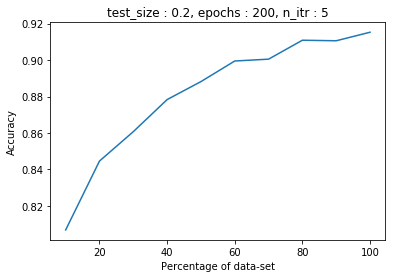

In [24]:
import matplotlib.pyplot as plt
x_axis = [10*i for i in range(1,11)]
title = []
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        title.append(["test_size : "+str(v),"epochs : " + str(e), "n_itr : " + str(n_itr)])
for i in range(0,len(overAllY)):
    y_axis = overAllY[i]
    plt.plot(x_axis,y_axis)
    plt.xlabel('Percentage of data-set')
    plt.ylabel('Accuracy')
    plt.title(title[i][0]+", "+title[i][1] + ", " + title[i][2])
    filename = "../dataset/bigdata3/result_dnn/graphs_dnn/"+str(title[i][0])+str(title[i][1])+str(title[i][2])+"_softmax"+".png"
    print(filename)
    plt.savefig(filename)
    plt.show()

In [25]:
with open("../dataset/bigdata3/result_dnn/dnn_result_5iterations.txt","a+") as f:
    for i in range(0,len(overAllY)):
        line = str(title[i][0])+", "+ str(title[i][1])+", "+str(title[i][2] + "_softmax")
        f.write(line+"\r\n")
        f.write(str(overAllY[i])+"\r\n")